In [3]:
#Import all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import sklearn.utils.validation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from explainerdashboard import ExplainerDashboard
from sklearn.datasets import make_regression
from yellowbrick.regressor import ResidualsPlot, PredictionError


In [4]:
import sklearn

print(sklearn.__version__)


1.2.2


In [5]:
 
Bike_Sharing_hour= pd.read_csv('/Users/nataliemac/Desktop/VCS/Python/05_Capital_Bike_Share/Bike-Sharing-Dataset/hour.csv')

Bike_Sharing_hour

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1               0           1  0.22  0.2727  0.80     0.0000       8   
2               0           1  0.22  0.2727  0.80     0.0000       5   
3               0           1  0.24  0.2879  0.75     0.0000       3   
4               0           1  0.24  0.2879  0.75     0.0000       0   
...           ...         ...   ...     ...   ...        ...     ...   
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
0              13   16  
1              32   40  
2              27   32  
3              10   13  
4               1    1  
...           ...  ...  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49  

[17379 rows x 17 columns]

In [6]:

#Change column names:
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'dteday': 'date'})
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'hr': 'hour'})
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'mnth': 'month'})
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'yr': 'year'})
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'cnt': 'total'})
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'weathersit': 'weather'})
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'hum': 'humidity'})
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'casual': 'non_member'})
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'registered': 'member'})




Bike_Sharing_hour.head(10)

instant        date  season  year  month  hour  holiday  weekday  \
0        1  2011-01-01       1     0      1     0        0        6   
1        2  2011-01-01       1     0      1     1        0        6   
2        3  2011-01-01       1     0      1     2        0        6   
3        4  2011-01-01       1     0      1     3        0        6   
4        5  2011-01-01       1     0      1     4        0        6   
5        6  2011-01-01       1     0      1     5        0        6   
6        7  2011-01-01       1     0      1     6        0        6   
7        8  2011-01-01       1     0      1     7        0        6   
8        9  2011-01-01       1     0      1     8        0        6   
9       10  2011-01-01       1     0      1     9        0        6   

   workingday  weather  temp   atemp  humidity  windspeed  non_member  member  \
0           0        1  0.24  0.2879      0.81     0.0000           3      13   
1           0        1  0.22  0.2727      0.80     0.0000           8      32   
2           0        1  0.22  0.2727      0.80     0.0000           5      27   
3           0        1  0.24  0.2879      0.75     0.0000           3      10   
4           0        1  0.24  0.2879      0.75     0.0000           0       1   
5           0        2  0.24  0.2576      0.75     0.0896           0       1   
6           0        1  0.22  0.2727      0.80     0.0000           2       0   
7           0        1  0.20  0.2576      0.86     0.0000           1       2   
8           0        1  0.24  0.2879      0.75     0.0000           1       7   
9           0        1  0.32  0.3485      0.76     0.0000           8       6   

   total  
0     16  
1     40  
2     32  
3     13  
4      1  
5      1  
6      2  
7      3  
8      8  
9     14

#Check correlation between target dependent variables and the independent variables


#Define the numeric columns for outlier detection
numeric_columns = ['season', 'workingday', 'temp', 'hour', 'humidity', 'total', 'member', 'non_member']

#Calculate the IQR for each numeric column
Q1 = Bike_Sharing_hour[numeric_columns].quantile(0.25)
Q3 = Bike_Sharing_hour[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

#Define the threshold for outlier detection
threshold = 1.5

#Create a boolean mask for outliers
outliers_mask = ((Bike_Sharing_hour[numeric_columns] < (Q1 - threshold * IQR)) |
                 (Bike_Sharing_hour[numeric_columns] > (Q3 + threshold * IQR))).any(axis=1)

#Remove rows with outliers
Bike_Sharing_hour_no_outliers = Bike_Sharing_hour[~outliers_mask]

#Print the shape of the dataset before and after removing outliers
print("Shape before removing outliers:", Bike_Sharing_hour.shape)
print("Shape after removing outliers:", Bike_Sharing_hour_no_outliers.shape)


In [7]:
Bike_Sharing_hour

instant        date  season  year  month  hour  holiday  weekday  \
0            1  2011-01-01       1     0      1     0        0        6   
1            2  2011-01-01       1     0      1     1        0        6   
2            3  2011-01-01       1     0      1     2        0        6   
3            4  2011-01-01       1     0      1     3        0        6   
4            5  2011-01-01       1     0      1     4        0        6   
...        ...         ...     ...   ...    ...   ...      ...      ...   
17374    17375  2012-12-31       1     1     12    19        0        1   
17375    17376  2012-12-31       1     1     12    20        0        1   
17376    17377  2012-12-31       1     1     12    21        0        1   
17377    17378  2012-12-31       1     1     12    22        0        1   
17378    17379  2012-12-31       1     1     12    23        0        1   

       workingday  weather  temp   atemp  humidity  windspeed  non_member  \
0               0        1  0.24  0.2879      0.81     0.0000           3   
1               0        1  0.22  0.2727      0.80     0.0000           8   
2               0        1  0.22  0.2727      0.80     0.0000           5   
3               0        1  0.24  0.2879      0.75     0.0000           3   
4               0        1  0.24  0.2879      0.75     0.0000           0   
...           ...      ...   ...     ...       ...        ...         ...   
17374           1        2  0.26  0.2576      0.60     0.1642          11   
17375           1        2  0.26  0.2576      0.60     0.1642           8   
17376           1        1  0.26  0.2576      0.60     0.1642           7   
17377           1        1  0.26  0.2727      0.56     0.1343          13   
17378           1        1  0.26  0.2727      0.65     0.1343          12   

       member  total  
0          13     16  
1          32     40  
2          27     32  
3          10     13  
4           1      1  
...       ...    ...  
17374     108    119  
17375      81     89  
17376      83     90  
17377      48     61  
17378      37     49  

[17379 rows x 17 columns]

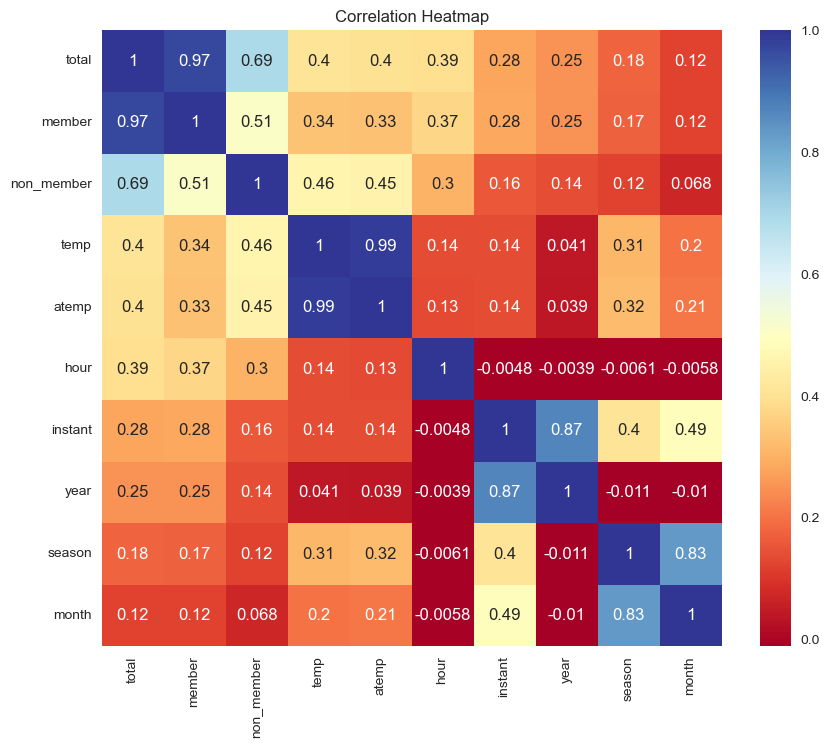

In [8]:
# calculate the correlations between each variable and the "quality" variable
correlations = Bike_Sharing_hour.corr()['total']

# sort the correlations from highest to lowest
sorted_correlations = correlations.sort_values(ascending=False)

# Get the top 10 variables with the highest correlation to quality
top_correlations = sorted_correlations[:10]

# Extract the correlation matrix for the top variables
top_variables = Bike_Sharing_hour[top_correlations.index]
correlation_matrix = top_variables.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlBu")
plt.title("Correlation Heatmap")
plt.show()


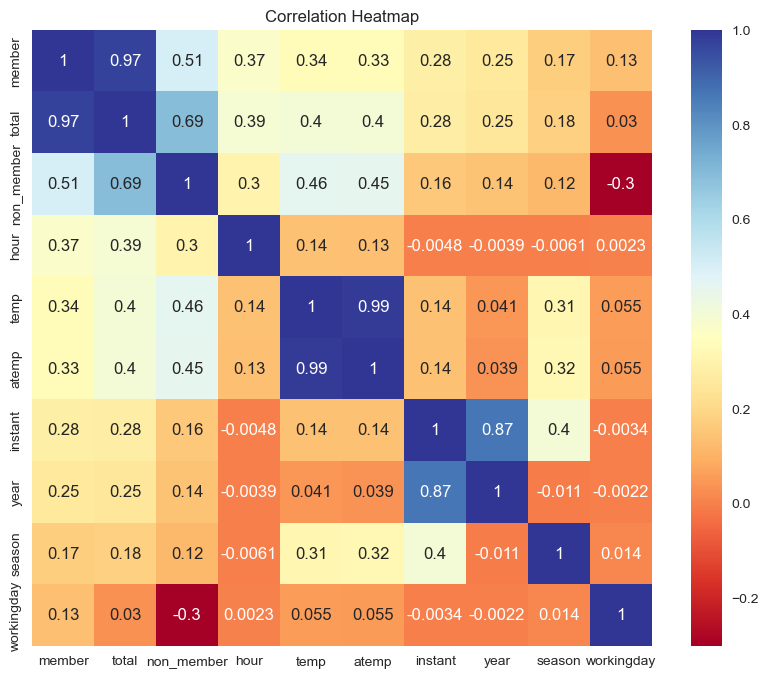

In [9]:
# calculate the correlations between each variable and the "quality" variable
correlations = Bike_Sharing_hour.corr()['member']

# sort the correlations from highest to lowest
sorted_correlations = correlations.sort_values(ascending=False)

# Get the top 10 variables with the highest correlation to quality
top_correlations = sorted_correlations[:10]

# Extract the correlation matrix for the top variables
top_variables = Bike_Sharing_hour[top_correlations.index]
correlation_matrix = top_variables.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlBu")
plt.title("Correlation Heatmap")
plt.show()


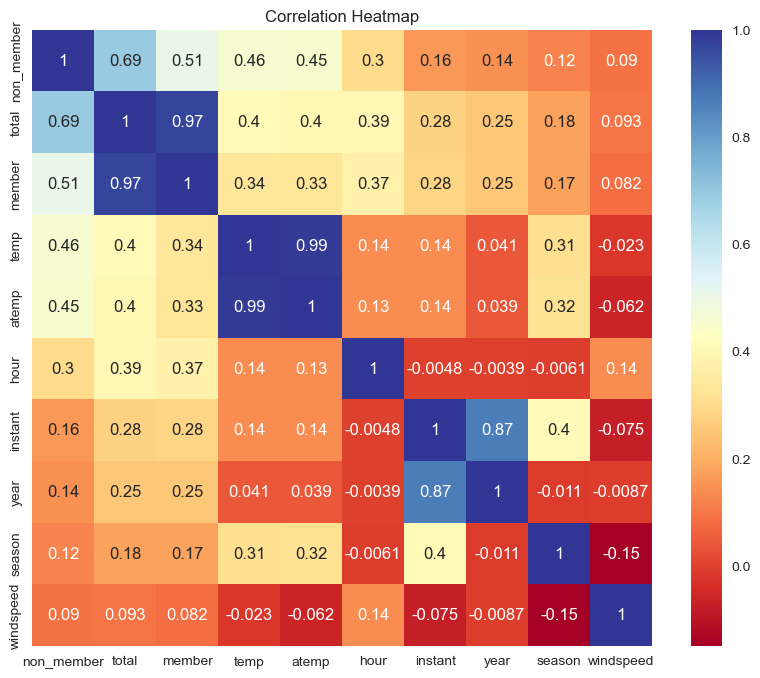

In [10]:
# calculate the correlations between each variable and the "quality" variable
correlations = Bike_Sharing_hour.corr()['non_member']

# sort the correlations from highest to lowest
sorted_correlations = correlations.sort_values(ascending=False)

# Get the top 10 variables with the highest correlation to quality
top_correlations = sorted_correlations[:10]

# Extract the correlation matrix for the top variables
top_variables = Bike_Sharing_hour[top_correlations.index]
correlation_matrix = top_variables.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlBu")
plt.title("Correlation Heatmap")
plt.show()


In [11]:


# Calculate the correlation matrix
correlation_matrix = Bike_Sharing_hour.corr()

# Extract the correlation values for the 'total' variable
correlation_with_total = correlation_matrix['total']

# Print the correlations
print(correlation_with_total)



instant       0.278379
season        0.178056
year          0.250495
month         0.120638
hour          0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weather      -0.142426
temp          0.404772
atemp         0.400929
humidity     -0.322911
windspeed     0.093234
non_member    0.694564
member        0.972151
total         1.000000
Name: total, dtype: float64


In [12]:


# Calculate the correlation matrix
correlation_matrix = Bike_Sharing_hour.corr()

# Extract the correlation values for the 'total' variable
correlation_with_total = correlation_matrix['member']

# Print the correlations
print(correlation_with_total)


instant       0.282046
season        0.174226
year          0.253684
month         0.122273
hour          0.374141
holiday      -0.047345
weekday       0.021578
workingday    0.134326
weather      -0.120966
temp          0.335361
atemp         0.332559
humidity     -0.273933
windspeed     0.082321
non_member    0.506618
member        1.000000
total         0.972151
Name: member, dtype: float64


In [13]:

# Calculate the correlation matrix
correlation_matrix = Bike_Sharing_hour.corr()

# Extract the correlation values for the 'total' variable
correlation_with_total = correlation_matrix['non_member']

# Print the correlations
print(correlation_with_total)


instant       0.158295
season        0.120206
year          0.142779
month         0.068457
hour          0.301202
holiday       0.031564
weekday       0.032721
workingday   -0.300942
weather      -0.152628
temp          0.459616
atemp         0.454080
humidity     -0.347028
windspeed     0.090287
non_member    1.000000
member        0.506618
total         0.694564
Name: non_member, dtype: float64


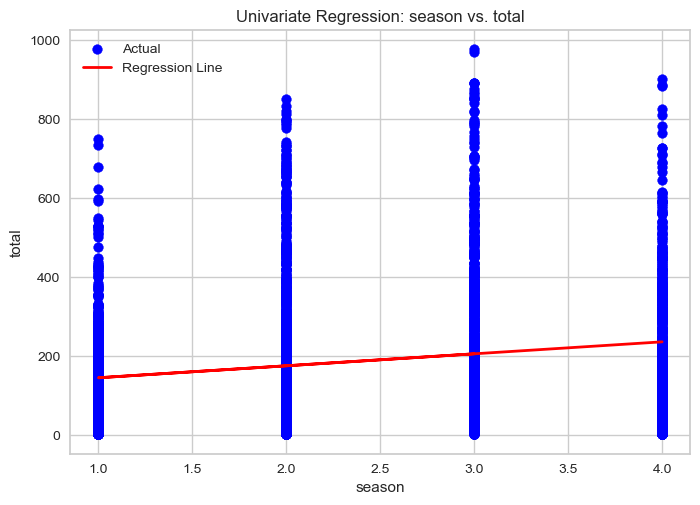

In [14]:


# Extract the selected feature and the target variable
feature = 'season'
target = 'total'
X = Bike_Sharing_hour[[feature]].values
y = Bike_Sharing_hour[target].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Plot the regression line and the actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel(feature)
plt.ylabel(target)
plt.title(f'Univariate Regression: {feature} vs. {target}')
plt.legend()
plt.show()


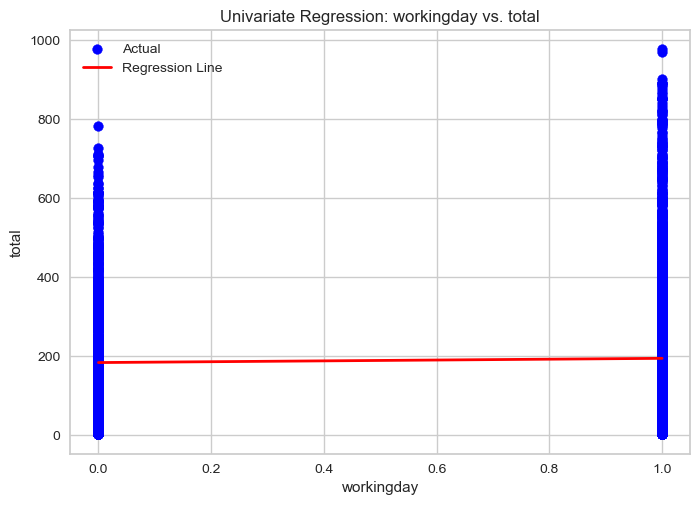

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Extract the selected feature and the target variable
feature = 'workingday'
target = 'total'
X = Bike_Sharing_hour[[feature]].values
y = Bike_Sharing_hour[target].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Plot the regression line and the actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel(feature)
plt.ylabel(target)
plt.title(f'Univariate Regression: {feature} vs. {target}')
plt.legend()
plt.show()


# MLM Regression

#Info about models

Random Forest Regression: RandomForestRegressor from scikit-learn. This algorithm is an ensemble method that combines multiple decision trees to make predictions.

Gradient Boosting Regression: GradientBoostingRegressor from scikit-learn. This algorithm builds an ensemble of weak prediction models (typically decision trees) in a stage-wise manner, where each new model corrects the mistakes of the previous ones.

Support Vector Regression: SVR from scikit-learn. This algorithm uses support vector machines to perform regression tasks. It can handle non-linear relationships between the features and the target variable.

K-Nearest Neighbors Regression: KNeighborsRegressor from scikit-learn. This algorithm predicts the target variable based on the average of the values of its k nearest neighbors in the feature space.

Neural Network Regression: MLPRegressor from scikit-learn. This algorithm represents a multi-layer perceptron neural network for regression tasks. It can capture complex relationships between the features and the target variable.
 


Based on the R2 score, mean squared error (MSE), and mean absolute 
The Random Forest Regression model has the highest R2 score, indicating better performance in explaining the variance in the target variable. It also has the lowest MSE and MAE values, suggesting better accuracy in predicting the target variable.


Random Forest Regression:
R2 Score: 0.8303548409117177
MSE: 5371.883743769098
MAE: 47.18306626840747

Gradient Boosting Regression:
R2 Score: 0.7986293727318108
MSE: 6376.483743527523
MAE: 55.040874151092005

Support Vector Regression:
R2 Score: 0.3422933557827197
MSE: 20826.551427860777
MAE: 91.77467444043631

K-Nearest Neighbors Regression:
R2 Score: 0.7984773946808861
MSE: 6381.296191024167
MAE: 52.39384349827388



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Neural Network Regression:
R2 Score: 0.5766438109517082
MSE: 13405.747868048893
MAE: 77.80591905912186

Linear Regression:
R2 Score: 0.3426737120422856
MSE: 20814.50729044723
MAE: 106.94738942340375

Decision Tree Regression:
R2 Score: 0.7304969877590382
MSE: 8533.923739024187
MAE: 58.10052742616034

Bayesian Ridge Regression:
R2 Score: 0.34265428271709064
MSE: 20815.122528021515
MAE: 106.94652857696141

Random Forest Regression: 0.8303548409117177
Gradient Boosting Regression: 0.7986293727318108
K-Nearest Neighbors Regression: 0.7984773946808861
Decision Tree Regression: 0.7304969877590382
Neural Network Regression: 0.5766438109517082
Linear Regression: 0.3426737120422856
Bayesian Ridge Regression: 0.34265428271709064
Support Vector Regression: 0.3422933557827197


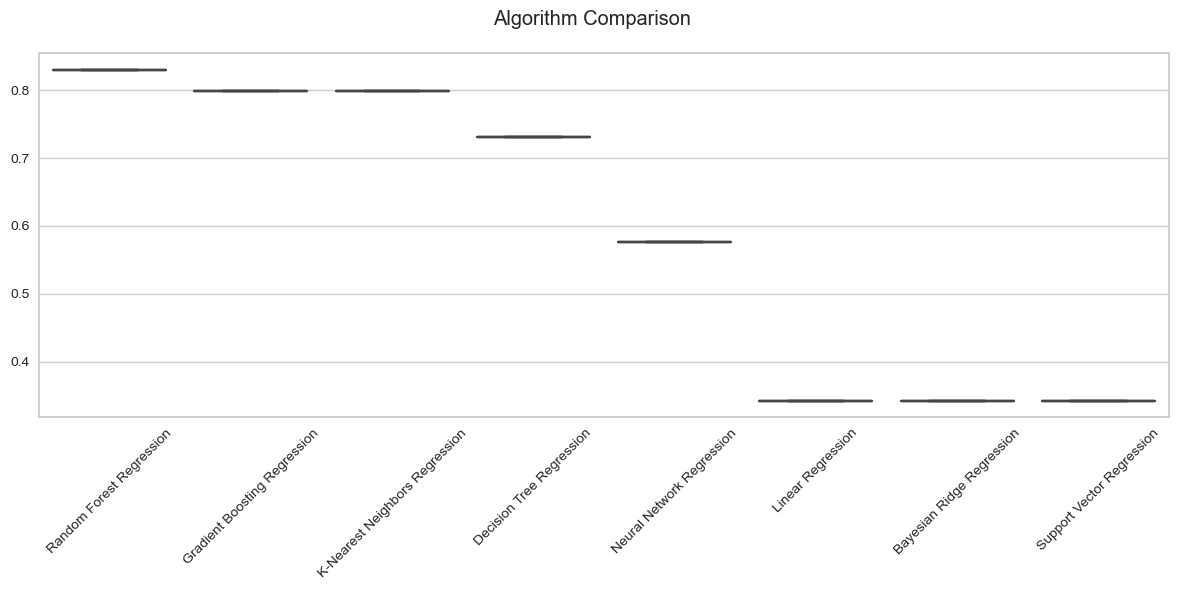

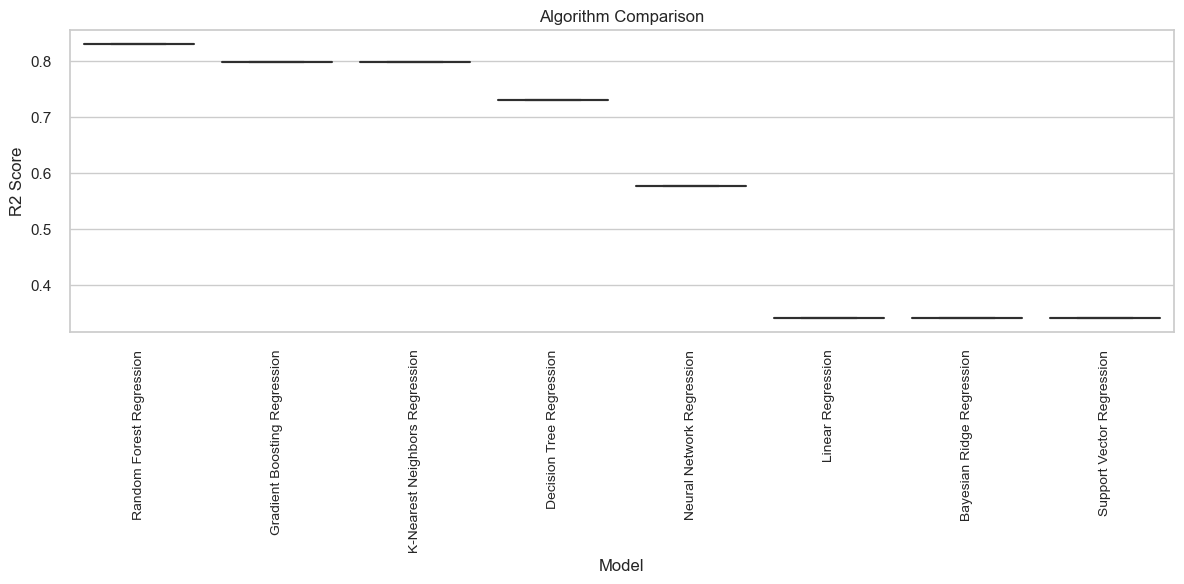

In [16]:
#Total Users
# Define the features and target variables
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'total'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Bike_Sharing_hour[features], Bike_Sharing_hour[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

# Function to evaluate the models and return the top models based on R2 score
def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores
for model, score in top_models[:10]:
    print(f"{model}: {score}")


# Plot the results of the models using seaborn boxplots
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
sns.boxplot(x=[name for name, _ in top_models], y=[score for _, score in top_models])
ax.set_xticklabels([name for name, _ in top_models], rotation=45)  # Rotate x-axis tick labels
plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

# Plot the accuracy results of the models using seaborn boxplots
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Add grid lines to the plot
sns.boxplot(x=[model[0] for model in top_models], y=[model[1] for model in top_models], palette="Blues")  # Use a different color palette

plt.title('Algorithm Comparison')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=90, fontsize=10)  # Rotate and adjust font size of x-axis tick labels

plt.tight_layout()  # Adjust the layout to prevent overlapping

plt.show()

Random Forest Regression:
R2 Score: 0.8298083899826585
MSE: 5389.187337212949
MAE: 47.22591282529962

Gradient Boosting Regression:
R2 Score: 0.7986293727318107
MSE: 6376.483743527524
MAE: 55.040874151092

Support Vector Regression:
R2 Score: 0.3422933557827197
MSE: 20826.551427860777
MAE: 91.77467444043631

K-Nearest Neighbors Regression:
R2 Score: 0.7984773946808861
MSE: 6381.296191024167
MAE: 52.39384349827388



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names


Neural Network Regression:
R2 Score: 0.557522219889675
MSE: 14011.24091443569
MAE: 81.57517740259212

Linear Regression:
R2 Score: 0.3426737120422856
MSE: 20814.50729044723
MAE: 106.94738942340375

Decision Tree Regression:
R2 Score: 0.7290656657509623
MSE: 8579.247139164832
MAE: 58.287859608745684

Bayesian Ridge Regression:
R2 Score: 0.34265428271709064
MSE: 20815.122528021515
MAE: 106.94652857696141

Model: Random Forest Regression


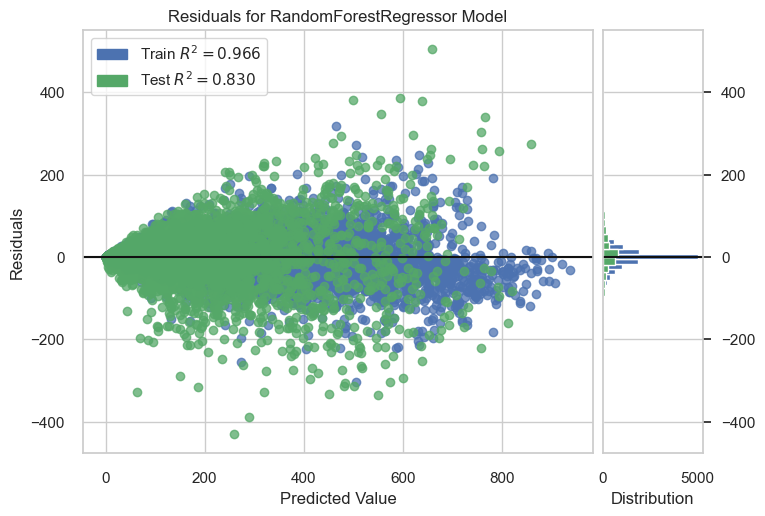

Model: Gradient Boosting Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names


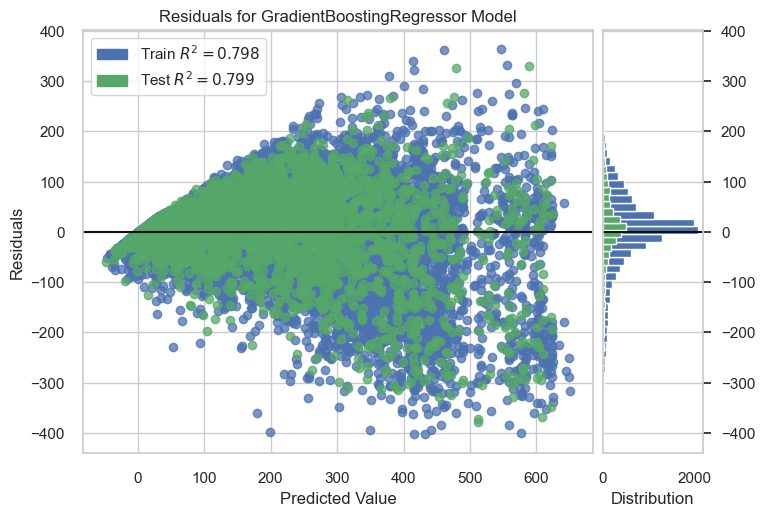

Model: K-Nearest Neighbors Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names


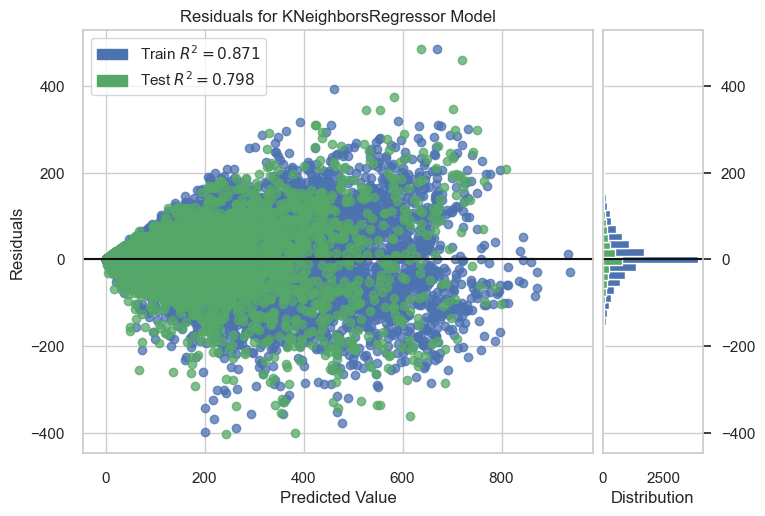

Model: Decision Tree Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


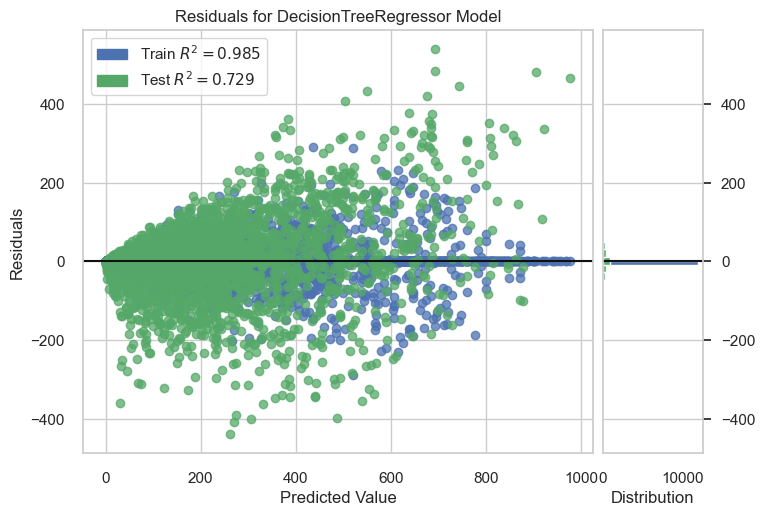

Model: Neural Network Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names


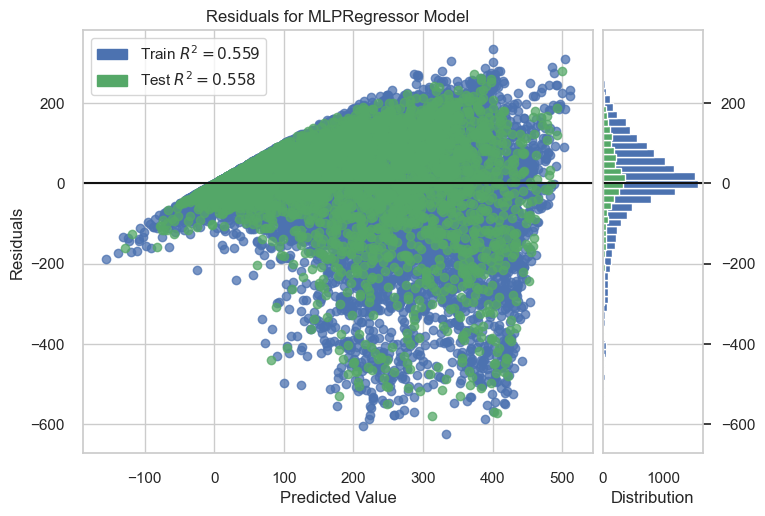

Model: Linear Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names


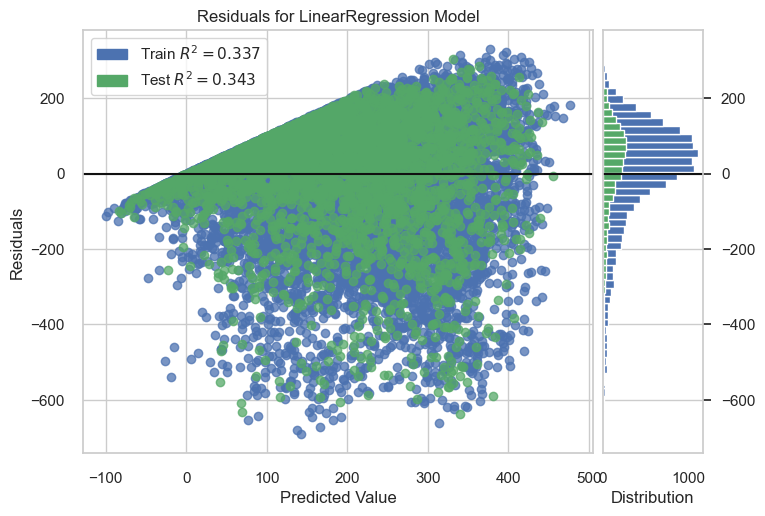

Model: Bayesian Ridge Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names


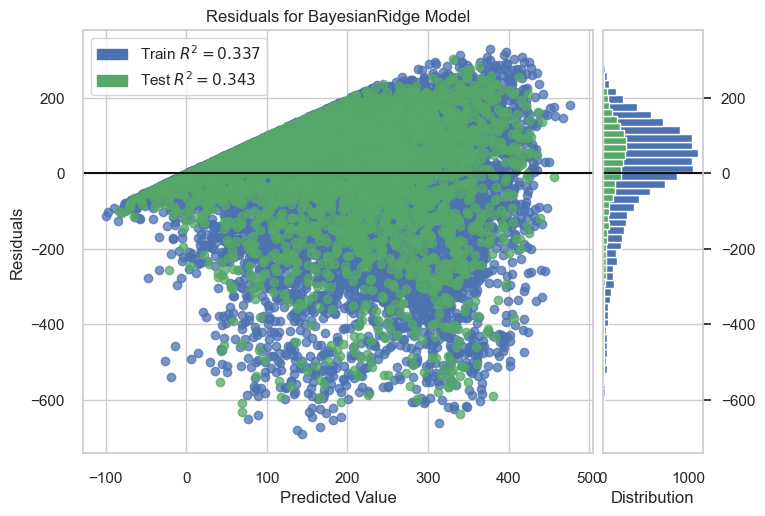

Model: Support Vector Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names


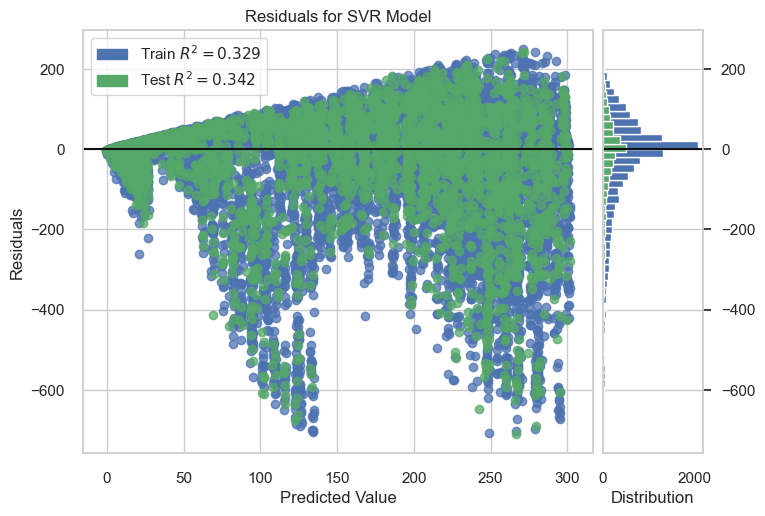

In [17]:
#Plotting residuals
# Get the top regression models
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Visualize the residuals for the top models
for name, r2_score in top_models:
    print(f"Model: {name}")
    model = next(model for model in models if model[0] == name)[1]

    residuals_plot = ResidualsPlot(model)
    residuals_plot.fit(X_train, y_train)
    residuals_plot.score(X_test, y_test)
    residuals_plot.show()


In [18]:
#Non Members
# Define the features and target variables
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'non_member'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Bike_Sharing_hour[features], Bike_Sharing_hour[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

# Function to evaluate the models and return the top models based on R2 score
def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores
for model, score in top_models[:10]:
    print(f"{model}: {score}")


# Plot the results of the models using seaborn boxplots
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
sns.boxplot(x=[name for name, _ in top_models], y=[score for _, score in top_models])
ax.set_xticklabels([name for name, _ in top_models], rotation=45)  # Rotate x-axis tick labels
plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

# Plot the accuracy results of the models using seaborn boxplots
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Add grid lines to the plot
sns.boxplot(x=[model[0] for model in top_models], y=[model[1] for model in top_models], palette="Blues")  # Use a different color palette

plt.title('Algorithm Comparison')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=90, fontsize=10)  # Rotate and adjust font size of x-axis tick labels

plt.tight_layout()  # Adjust the layout to prevent overlapping

plt.show()

TypeError: 'numpy.float64' object is not callable

Random Forest Regression:
R2 Score: 0.8025543347330266
MSE: 3043.95618135277
MAE: 36.368955312792366

Gradient Boosting Regression:
R2 Score: 0.7652730989483598
MSE: 3618.7089770738753
MAE: 42.2351584533033

Support Vector Regression:
R2 Score: 0.2951669585311085
MSE: 10866.183820748474
MAE: 65.89742211199896

K-Nearest Neighbors Regression:
R2 Score: 0.7748274970732316
MSE: 3471.411900726392
MAE: 39.32003631961259



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Neural Network Regression:
R2 Score: 0.5153399542317646
MSE: 7471.84771150155
MAE: 60.136979359711106

Linear Regression:
R2 Score: 0.28820175867867626
MSE: 10973.56406187203
MAE: 76.86588066652965

Decision Tree Regression:
R2 Score: 0.664573715629079
MSE: 5171.158912597525
MAE: 45.87737086359967

Bayesian Ridge Regression:
R2 Score: 0.2882747501974462
MSE: 10972.43877515355
MAE: 76.8642220155154

Random Forest Regression: 0.8025543347330266
K-Nearest Neighbors Regression: 0.7748274970732316
Gradient Boosting Regression: 0.7652730989483598
Decision Tree Regression: 0.664573715629079
Neural Network Regression: 0.5153399542317646
Support Vector Regression: 0.2951669585311085
Bayesian Ridge Regression: 0.2882747501974462
Linear Regression: 0.28820175867867626


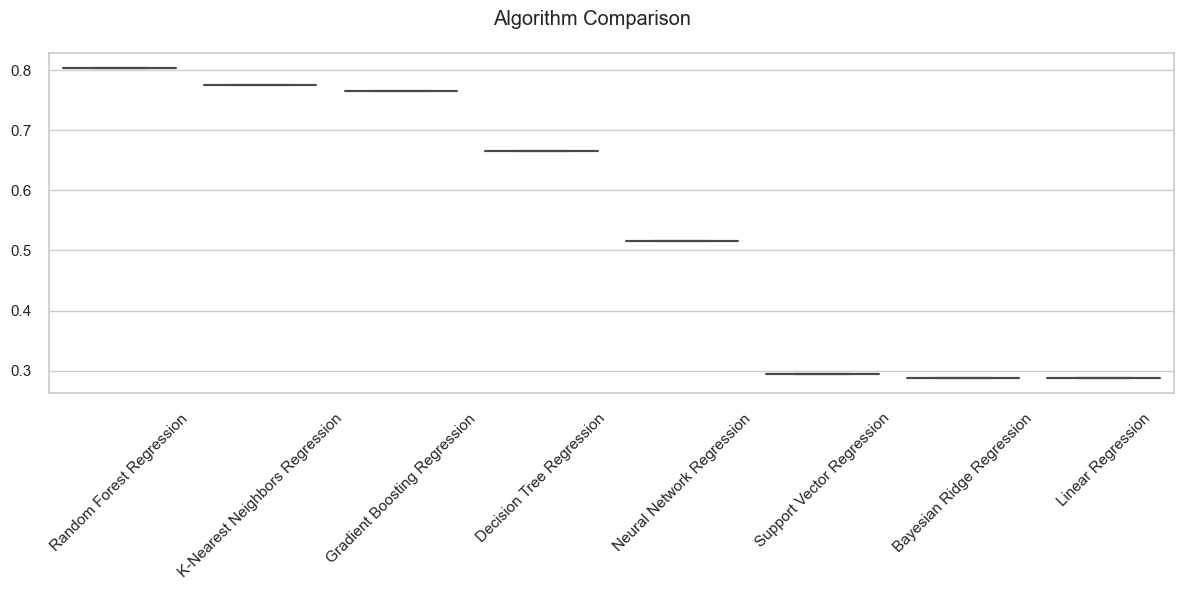

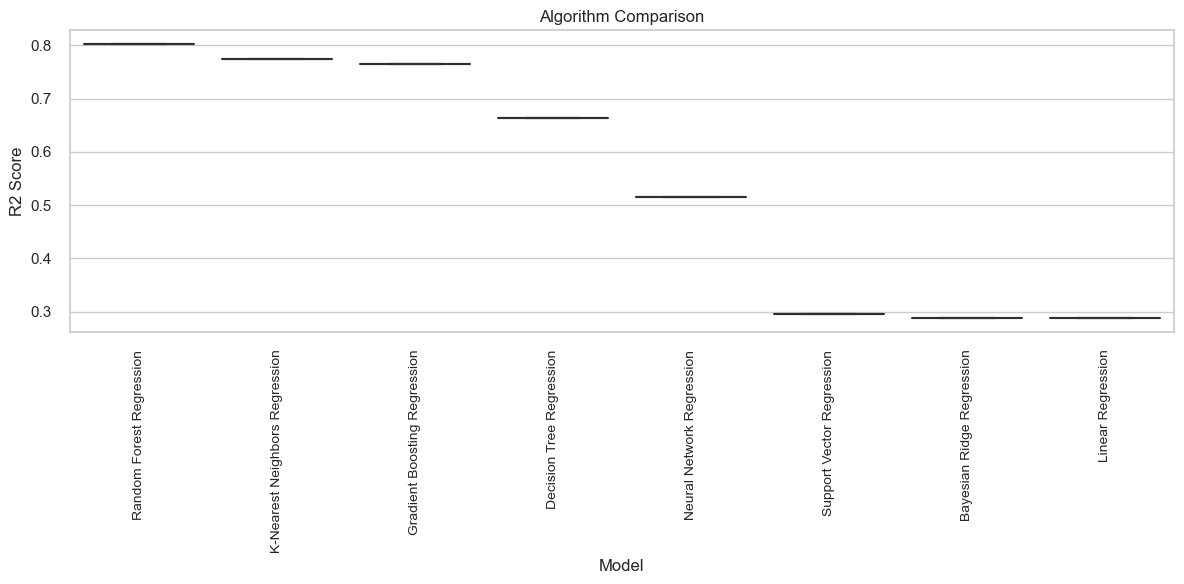

In [ ]:
#Members
# Define the features and target variables
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'member'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Bike_Sharing_hour[features], Bike_Sharing_hour[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

# Function to evaluate the models and return the top models based on R2 score
def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores
for model, score in top_models[:10]:
    print(f"{model}: {score}")


# Plot the results of the models using seaborn boxplots
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
sns.boxplot(x=[name for name, _ in top_models], y=[score for _, score in top_models])
ax.set_xticklabels([name for name, _ in top_models], rotation=45)  # Rotate x-axis tick labels
plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

# Plot the accuracy results of the models using seaborn boxplots
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Add grid lines to the plot
sns.boxplot(x=[model[0] for model in top_models], y=[model[1] for model in top_models], palette="Blues")  # Use a different color palette

plt.title('Algorithm Comparison')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=90, fontsize=10)  # Rotate and adjust font size of x-axis tick labels

plt.tight_layout()  # Adjust the layout to prevent overlapping

plt.show()

#The R2 score represents the proportion of variance in the target variable that is predictable from the features. Higher values closer to 1 indicate a better fit.

The MSE (Mean Squared Error) measures the average squared difference between the predicted and actual values. Lower values indicate better accuracy.

The MAE (Mean Absolute Error) measures the average absolute difference between the predicted and actual values. Lower values indicate better accuracy.

The R2 score ranges between 0 and 1. A score of 0 indicates that the model fails to explain any of the variability in the target variable, while a score of 1 indicates a perfect fit where the model can explain all the variability. In practice, R2 scores close to 1 are considered better, indicating a higher proportion of the target variable's variance being explained by the model.

In the provided results, the R2 scores range from 0.0267 to 0.1859. These scores suggest that the models explain between 2.67% and 18.59% of the variance in the number of bike rides per day based on the given features. While the scores are relatively low, it's important to interpret them in the context of the specific problem and the available data.

In [ ]:
#Feature Importance for the most accurate model
# Fit the Random Forest Regression model on the training data
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Get the feature importances
feature_importances = rf_model.feature_importances_

# Print the feature importance values
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance}")


season: 0.04756571545976071
holiday: 0.0035341516954035352
workingday: 0.122831219313797
weather: 0.02988062173425678
temp: 0.13075023787545847
hour: 0.5757450558060558
humidity: 0.08969299811526765


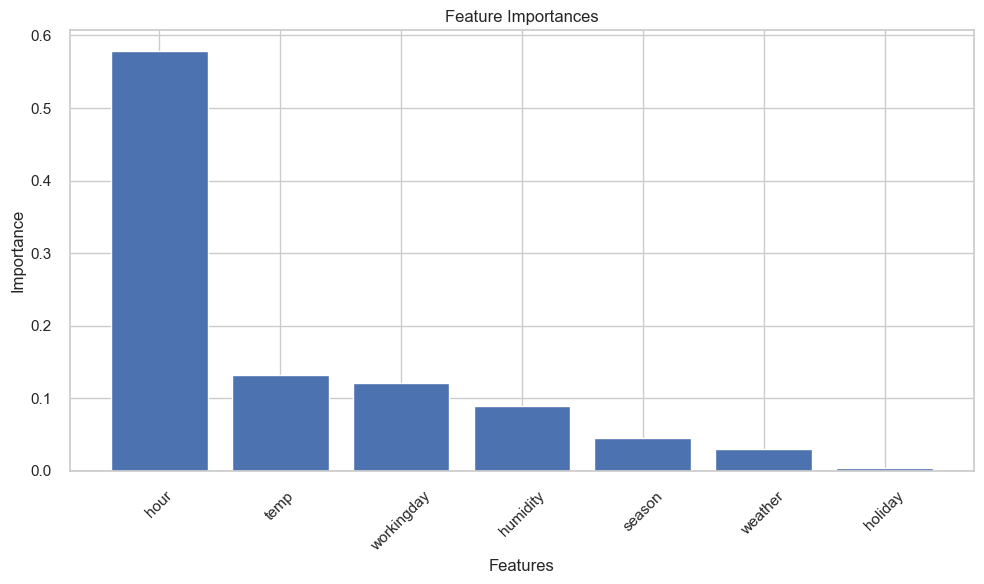

In [ ]:
#Plot feature importance
# Fit the Random Forest Regression model on the training data
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Get the feature importances
feature_importances = rf_model.feature_importances_

# Create a dictionary to store feature importance values
feature_importance_dict = {}

# Assign feature importance values to corresponding feature names
for feature, importance in zip(features, feature_importances):
    feature_importance_dict[feature] = importance

# Sort the feature importance dictionary in descending order of importance
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract the feature names and importance values
sorted_features = [feature for feature, _ in sorted_feature_importances]
sorted_importances = [importance for _, importance in sorted_feature_importances]

# Plot the feature importances as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importances)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)  # Rotate x-axis tick labels for better visibility
plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()


In [ ]:

# Define the features and target variables for all models
features = ['season', 'workingday', 'weather', 'temp', 'hour', 'humidity','holiday']
target = 'total'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Bike_Sharing_hour[features], Bike_Sharing_hour[target], test_size=0.2, random_state=42)

def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Get the feature importances if the model supports it
        if hasattr(model, 'feature_importances_'):
            feature_importances = model.feature_importances_
            sorted_feature_importances = sorted(zip(features, feature_importances), key=lambda x: x[1], reverse=True)
            print('Feature Importance:')
            for feature, importance in sorted_feature_importances:
                print(f'{feature}: {importance}')
            print('\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores
for model, score in top_models[:10]:
    print(f"{model}: {score}")

Random Forest Regression:
R2 Score: 0.8070130804222148
MSE: 4140.081755989273
MAE: 42.895508634315306

Feature Importance:
hour: 0.5800444049056694
temp: 0.17136363146113906
humidity: 0.08975128222793494
workingday: 0.08928877063475436
season: 0.036531909695147226
weather: 0.02938804903636508
holiday: 0.00363195203898991


Gradient Boosting Regression:
R2 Score: 0.7748186366100772
MSE: 4830.73804379602
MAE: 49.46313796298122

Feature Importance:
hour: 0.6962743491744176
temp: 0.1333017247096012
workingday: 0.08636220920569074
season: 0.03775512526949654
humidity: 0.02592866286769454
weather: 0.020091834278671828
holiday: 0.0002860944944276015


Support Vector Regression:
R2 Score: 0.3707658557593547
MSE: 13498.742850114331
MAE: 78.15518644776027

K-Nearest Neighbors Regression:
R2 Score: 0.7797070800707011
MSE: 4725.867953995157
MAE: 46.432748184019374

Neural Network Regression:
R2 Score: 0.5737196944061875
MSE: 9144.84422046615
MAE: 68.38506886865892

Linear Regression:
R2 Score: 0.3

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


In [ ]:
# Define the features and target variables acorss all models
features = ['season', 'workingday', 'weather', 'temp', 'hour', 'humidity', 'holiday']
target = 'member'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Bike_Sharing_hour[features], Bike_Sharing_hour[target], test_size=0.2, random_state=42)

def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Get the feature importances if the model supports it
        if hasattr(model, 'feature_importances_'):
            feature_importances = model.feature_importances_
            sorted_feature_importances = sorted(zip(features, feature_importances), key=lambda x: x[1], reverse=True)
            print('Feature Importance:')
            for feature, importance in sorted_feature_importances:
                print(f'{feature}: {importance}')
            print('\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores
for model, score in top_models[:10]:
    print(f"{model}: {score}")

Random Forest Regression:
R2 Score: 0.7995141506892876
MSE: 3090.8257188524985
MAE: 36.50099220505584

Feature Importance:
hour: 0.5769906356680075
temp: 0.13435525815589225
workingday: 0.1204476502236097
humidity: 0.09012274265340128
season: 0.04502915607589729
weather: 0.02948838339945353
holiday: 0.003566173823738491


Gradient Boosting Regression:
R2 Score: 0.7652718747525943
MSE: 3618.727850105413
MAE: 42.235592935221895

Feature Importance:
hour: 0.7377187419237407
workingday: 0.11698304172564297
temp: 0.07509243621946525
season: 0.03548026765552757
weather: 0.018979157204144205
humidity: 0.015746355271479256
holiday: 0.0


Support Vector Regression:
R2 Score: 0.2951669585311085
MSE: 10866.183820748474
MAE: 65.89742211199895

K-Nearest Neighbors Regression:
R2 Score: 0.7745572118138497
MSE: 3475.5788014527843
MAE: 39.336985472154964

Neural Network Regression:
R2 Score: 0.5099446719686533
MSE: 7555.025039161463
MAE: 59.023819128211926

Linear Regression:
R2 Score: 0.2882017586786

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


In [ ]:

# Define the features and target variables across all models
features = ['season', 'workingday', 'weather', 'temp', 'hour', 'humidity','holiday']
target = 'non_member'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Bike_Sharing_hour[features], Bike_Sharing_hour[target], test_size=0.2, random_state=42)

def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Get the feature importances if the model supports it
        if hasattr(model, 'feature_importances_'):
            feature_importances = model.feature_importances_
            sorted_feature_importances = sorted(zip(features, feature_importances), key=lambda x: x[1], reverse=True)
            print('Feature Importance:')
            for feature, importance in sorted_feature_importances:
                print(f'{feature}: {importance}')
            print('\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores
for model, score in top_models[:10]:
    print(f"{model}: {score}")

Random Forest Regression:
R2 Score: 0.7977014805777413
MSE: 257.4783624886289
MAE: 9.960993562833455

Feature Importance:
hour: 0.4239949580631468
temp: 0.27321394212438105
workingday: 0.13171264044786968
humidity: 0.1183432845565126
season: 0.02518812736064412
weather: 0.021130167445128908
holiday: 0.0064168800023169294


Gradient Boosting Regression:
R2 Score: 0.7705629095597906
MSE: 292.01937072704345
MAE: 11.065512680127027

Feature Importance:
hour: 0.421753979090762
temp: 0.3079135892102161
workingday: 0.19201425335555555
humidity: 0.05789350414680162
season: 0.010433689663499475
weather: 0.008273818829453961
holiday: 0.0017171657037112213


Support Vector Regression:
R2 Score: 0.41557121377631856
MSE: 743.8401788497396
MAE: 16.565320412222334

K-Nearest Neighbors Regression:
R2 Score: 0.7340231450428318
MSE: 338.5258837772397
MAE: 11.331476997578692

Neural Network Regression:
R2 Score: 0.7143652702750425
MSE: 363.5457278159995
MAE: 12.607225564185006

Linear Regression:
R2 Scor

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


In [ ]:

# Define the features and target variables
features = ['season', 'workingday', 'weather', 'temp', 'hour', 'humidity', 'holiday']
target = 'member'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Bike_Sharing_hour[features], Bike_Sharing_hour[target], test_size=0.2, random_state=42)

def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Get the feature importances if the model supports it
        if hasattr(model, 'feature_importances_'):
            feature_importances = model.feature_importances_
            sorted_feature_importances = sorted(zip(features, feature_importances), key=lambda x: x[1], reverse=True)
            print('Feature Importance:')
            for feature, importance in sorted_feature_importances:
                print(f'{feature}: {importance}')
            print('\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models



# Get the top regression models and their scores
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores
for model, score in top_models[:10]:
    print(f"{model}: {score}")

Random Forest Regression:
R2 Score: 0.7991538742148355
MSE: 3096.3799851359418
MAE: 36.56173739033363

Feature Importance:
hour: 0.5759641784968045
temp: 0.13487262825044835
workingday: 0.12076595551811281
humidity: 0.09038781597016055
season: 0.04519488914742071
weather: 0.029299772266185558
holiday: 0.0035147603508675234


Gradient Boosting Regression:
R2 Score: 0.7652718747525943
MSE: 3618.727850105413
MAE: 42.2355929352219

Feature Importance:
hour: 0.7377189979307589
workingday: 0.11698304172564078
temp: 0.0750921802124476
season: 0.035480267655527746
weather: 0.018979157204144885
humidity: 0.015746355271480068
holiday: 0.0


Support Vector Regression:
R2 Score: 0.2951669585311085
MSE: 10866.183820748474
MAE: 65.89742211199895

K-Nearest Neighbors Regression:
R2 Score: 0.7745572118138497
MSE: 3475.5788014527843
MAE: 39.336985472154964

Neural Network Regression:
R2 Score: 0.49699007148220964
MSE: 7754.741939374729
MAE: 59.85156668656536

Linear Regression:
R2 Score: 0.288201758678

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Random Forest Regression:
R2 Score: 0.8037952069351859
MSE: 4209.113684919357
MAE: 43.36615575391539

Gradient Boosting Regression:
R2 Score: 0.772706940695987
MSE: 4876.039527167271
MAE: 49.572136680063906

Support Vector Regression:
R2 Score: 0.3722757957576641
MSE: 13466.350628645045
MAE: 77.94686327253886

K-Nearest Neighbors Regression:
R2 Score: 0.7784907792600939
MSE: 4751.960835351089
MAE: 46.74618644067797



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Neural Network Regression:
R2 Score: 0.5294067869604593
MSE: 10095.473724643276
MAE: 75.10916256505143

Linear Regression:
R2 Score: 0.3423538756848904
MSE: 14108.255249271566
MAE: 89.21531513736166

Decision Tree Regression:
R2 Score: 0.678649768944111
MSE: 6893.815559044593
MAE: 54.10925645682002

Bayesian Ridge Regression:
R2 Score: 0.34239836464063145
MSE: 14107.300843064091
MAE: 89.21582659080462

Random Forest Regression: 0.8037952069351859
K-Nearest Neighbors Regression: 0.7784907792600939
Gradient Boosting Regression: 0.772706940695987
Decision Tree Regression: 0.678649768944111
Neural Network Regression: 0.5294067869604593
Support Vector Regression: 0.3722757957576641
Bayesian Ridge Regression: 0.34239836464063145
Linear Regression: 0.3423538756848904


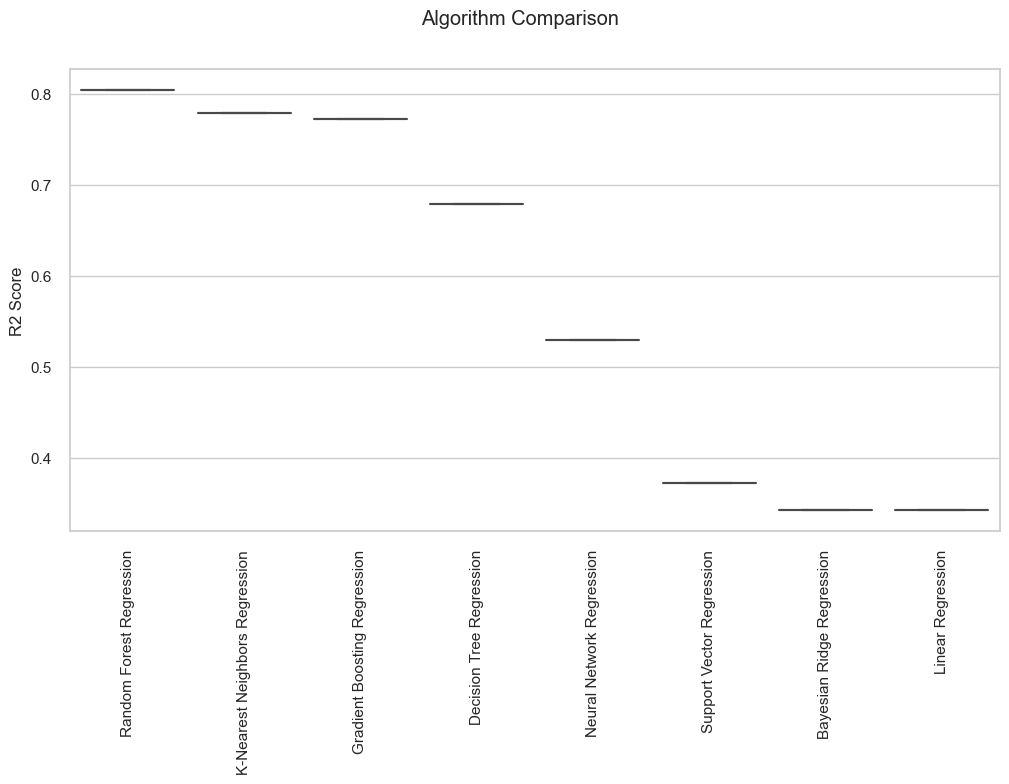

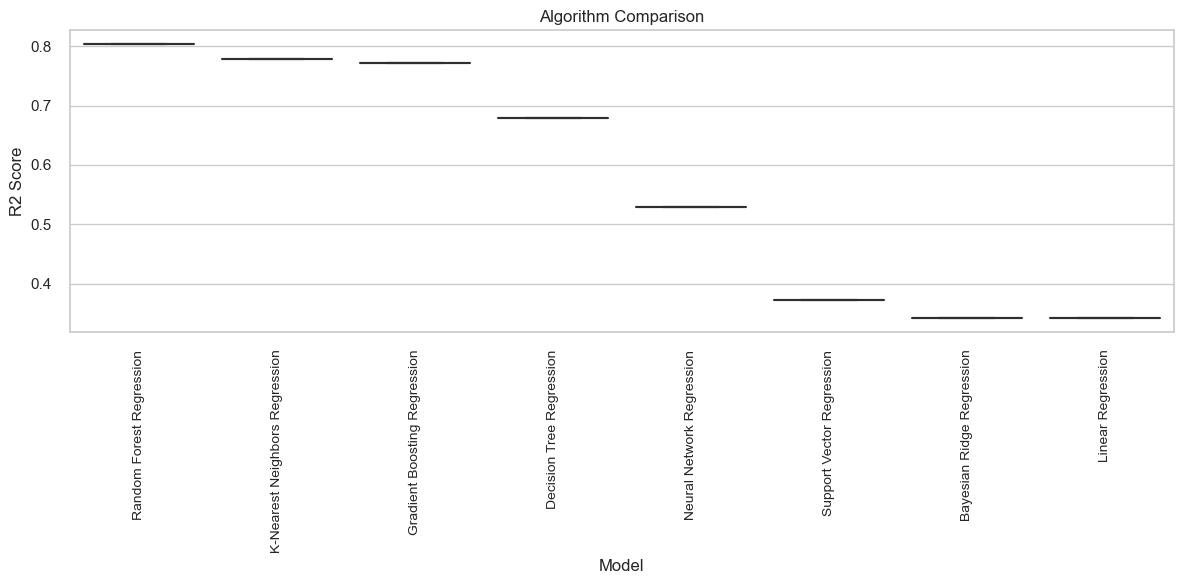

In [ ]:
#remove holiday and weather

# Define the features and target variables
features = ['workingday', 'weather', 'temp', 'hour', 'humidity', 'season']
target = 'total'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Bike_Sharing_hour[features], Bike_Sharing_hour[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

# Function to evaluate the models and return the top models based on R2 score
def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores
for model, score in top_models[:10]:
    print(f"{model}: {score}")

# Plot the accuracy results of the models using seaborn boxplots
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
sns.boxplot(x=[model[0] for model in top_models], y=[model[1] for model in top_models])
ax.set_ylabel('R2 Score')
ax.set_xticklabels([model[0] for model in top_models], rotation=90)
plt.show()


# Plot the accuracy results of the models using seaborn boxplots
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Add grid lines to the plot
sns.boxplot(x=[model[0] for model in top_models], y=[model[1] for model in top_models], palette="Blues")  # Use a different color palette

plt.title('Algorithm Comparison')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=90, fontsize=10)  # Rotate and adjust font size of x-axis tick labels

plt.tight_layout()  # Adjust the layout to prevent overlapping

plt.show()


Random Forest Regression:
R2 Score: 0.7945380580482159
MSE: 3167.540535221314
MAE: 36.91642488686488

Gradient Boosting Regression:
R2 Score: 0.7652702833281394
MSE: 3618.752384583291
MAE: 42.23611928386974

Support Vector Regression:
R2 Score: 0.29585579717319255
MSE: 10855.564217427776
MAE: 65.7951332930623

K-Nearest Neighbors Regression:
R2 Score: 0.7722687731638044
MSE: 3510.8589225181595
MAE: 39.60042372881356



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Neural Network Regression:
R2 Score: 0.5138345083012341
MSE: 7495.056686181924
MAE: 58.64796832024056

Linear Regression:
R2 Score: 0.28818501557751586
MSE: 10973.822184866034
MAE: 76.87450366954108

Decision Tree Regression:
R2 Score: 0.6580911052711402
MSE: 5271.099227031208
MAE: 46.168321226795804

Bayesian Ridge Regression:
R2 Score: 0.288247674468603
MSE: 10972.856192938163
MAE: 76.87332778085693

Random Forest Regression: 0.7945380580482159
K-Nearest Neighbors Regression: 0.7722687731638044
Gradient Boosting Regression: 0.7652702833281394
Decision Tree Regression: 0.6580911052711402
Neural Network Regression: 0.5138345083012341
Support Vector Regression: 0.29585579717319255
Bayesian Ridge Regression: 0.288247674468603
Linear Regression: 0.28818501557751586


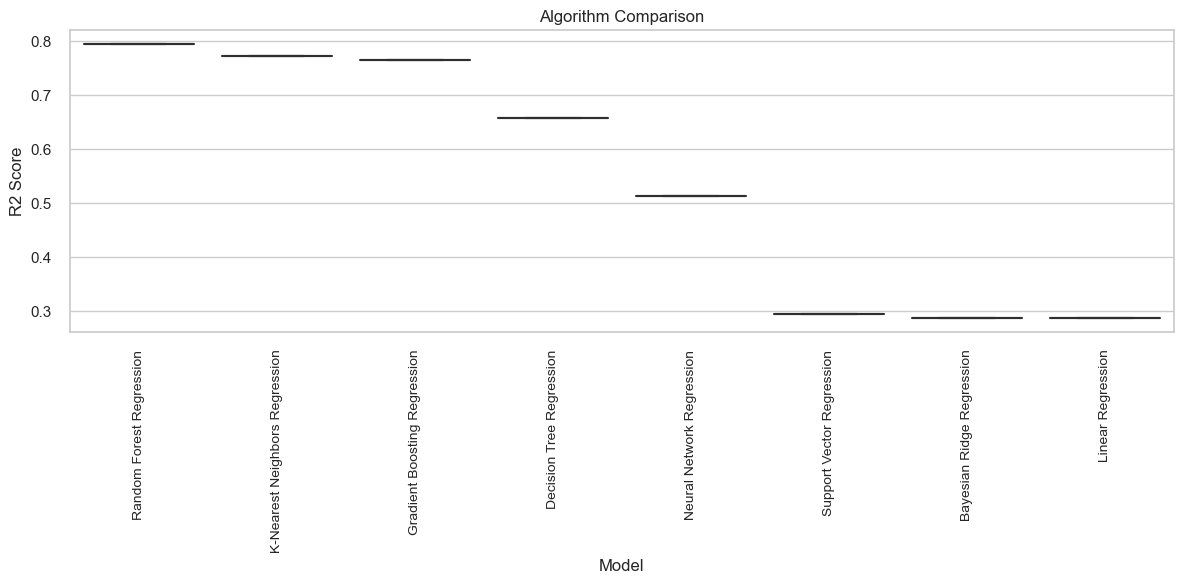

In [ ]:
#remove holiday and weather

# Define the features and target variables
features = ['workingday', 'weather', 'temp', 'hour', 'humidity', 'season']
target = 'member'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Bike_Sharing_hour[features], Bike_Sharing_hour[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

# Function to evaluate the models and return the top models based on R2 score
def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores
for model, score in top_models[:10]:
    print(f"{model}: {score}")

# Plot the accuracy results of the models using seaborn boxplots
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Add grid lines to the plot
sns.boxplot(x=[model[0] for model in top_models], y=[model[1] for model in top_models], palette="Blues")  # Use a different color palette

plt.title('Algorithm Comparison')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=90, fontsize=10)  # Rotate and adjust font size of x-axis tick labels

plt.tight_layout()  # Adjust the layout to prevent overlapping


plt.show()

Random Forest Regression:
R2 Score: 0.794910982503281
MSE: 261.0300092173921
MAE: 10.004376650261563

Gradient Boosting Regression:
R2 Score: 0.7697067243662111
MSE: 293.1090927984625
MAE: 11.071090088184457

Support Vector Regression:
R2 Score: 0.4199565475028888
MSE: 738.2586820097818
MAE: 16.504992875547952

K-Nearest Neighbors Regression:
R2 Score: 0.7321832005090007
MSE: 340.8676997578692
MAE: 11.323002421307505



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Neural Network Regression:
R2 Score: 0.7155283949765248
MSE: 362.06534405262335
MAE: 12.604051791799819

Linear Regression:
R2 Score: 0.45708207709014703
MSE: 691.0066280058778
MAE: 18.977351990583415

Decision Tree Regression:
R2 Score: 0.6378936986270947
MSE: 460.87602514628736
MAE: 12.846085552865214

Bayesian Ridge Regression:
R2 Score: 0.45709278173946977
MSE: 690.9930035088399
MAE: 18.975756920805512

Random Forest Regression: 0.794910982503281
Gradient Boosting Regression: 0.7697067243662111
K-Nearest Neighbors Regression: 0.7321832005090007
Neural Network Regression: 0.7155283949765248
Decision Tree Regression: 0.6378936986270947
Bayesian Ridge Regression: 0.45709278173946977
Linear Regression: 0.45708207709014703
Support Vector Regression: 0.4199565475028888


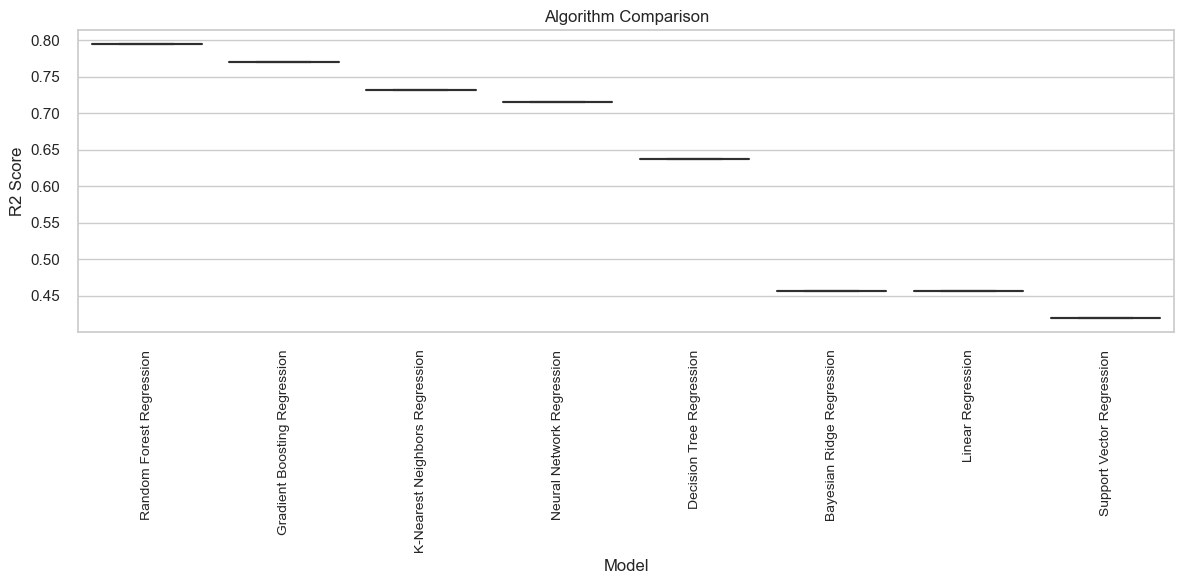

In [ ]:
#remove holiday and weather

# Define the features and target variables
features = ['workingday', 'weather', 'temp', 'hour', 'humidity', 'season']
target = 'non_member'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Bike_Sharing_hour[features], Bike_Sharing_hour[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

# Function to evaluate the models and return the top models based on R2 score
def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores
for model, score in top_models[:10]:
    print(f"{model}: {score}")



# Plot the accuracy results of the models using seaborn boxplots
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Add grid lines to the plot
sns.boxplot(x=[model[0] for model in top_models], y=[model[1] for model in top_models], palette="Blues")  # Use a different color palette

plt.title('Algorithm Comparison')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=90, fontsize=10)  # Rotate and adjust font size of x-axis tick labels

plt.tight_layout()  # Adjust the layout to prevent overlapping

plt.show()

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


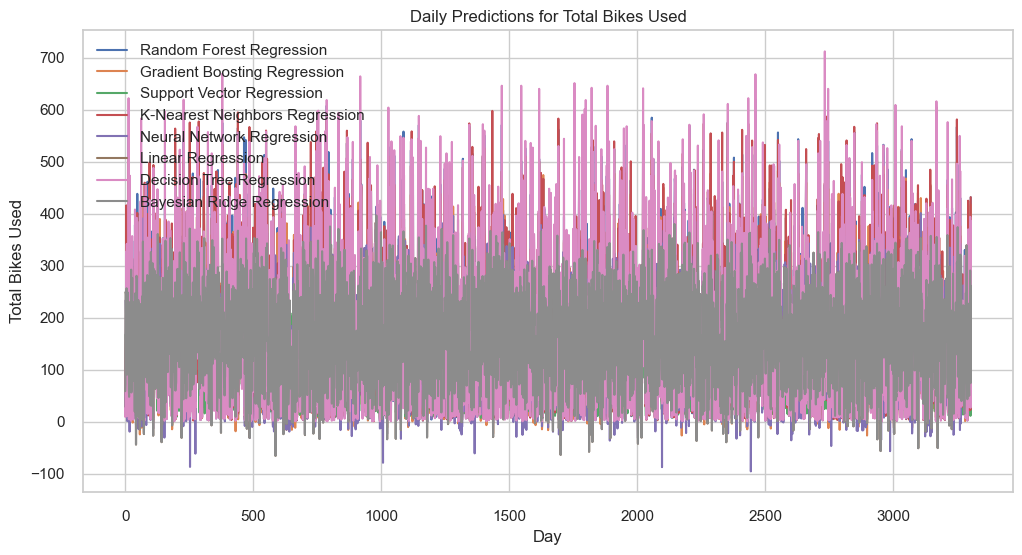

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features and target variables
features = ['season', 'workingday', 'temp', 'hour', 'humidity']
target = 'total'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Bike_Sharing_hour[features], Bike_Sharing_hour[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

# Function to evaluate the models and return the daily predictions
def predict_daily_bike_usage(models, X_train, X_test, y_train):
    daily_predictions = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make daily predictions on the testing data
        daily_pred = model.predict(X_test)
        
        # Add the daily predictions to the list
        daily_predictions.append(daily_pred)
        
    return daily_predictions

# Get the daily predictions for each model
daily_predictions = predict_daily_bike_usage(models, X_train, X_test, y_train)

# Plot the daily predictions for each model
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Add grid lines to the plot
for name, daily_pred in zip([model[0] for model in models], daily_predictions):
    plt.plot(daily_pred, label=name)
plt.xlabel('Day')
plt.ylabel('Total Bikes Used')
plt.title('Daily Predictions for Total Bikes Used')
plt.legend()
plt.show()


#Try to get a numerical prediction for a day and not a scenerio

In [ ]:
#Predict per day
# Define the features and target variables
features = ['season', 'workingday', 'temp', 'hour', 'humidity']
target = 'total'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Bike_Sharing_hour[features], Bike_Sharing_hour[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

# Function to evaluate the models and return the daily predictions
def predict_daily_bike_usage(models, X_train, X_test, y_train):
    daily_predictions = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make daily predictions on the testing data
        daily_pred = model.predict(X_test)
        
        # Print the predicted number of bikes for each day
        print(f"Model: {name}")
        for i, pred in enumerate(daily_pred):
            print(f"Day {i+1}: {pred}")
        print()
        
        # Add the daily predictions to the list
        daily_predictions.append(daily_pred)
        
    return daily_predictions

# Get the daily predictions for each model
daily_predictions = predict_daily_bike_usage(models, X_train, X_test, y_train)


Model: Random Forest Regression
Day 1: 17.986666666666665
Day 2: 14.06
Day 3: 105.27933333333333
Day 4: 166.5225
Day 5: 369.90045238095234
Day 6: 154.59107142857144
Day 7: 334.5525
Day 8: 13.58
Day 9: 32.18666666666667
Day 10: 209.83
Day 11: 185.06088095238098
Day 12: 78.7
Day 13: 15.08
Day 14: 536.0936666666666
Day 15: 4.97
Day 16: 38.86833333333333
Day 17: 43.97283333333333
Day 18: 24.061999999999998
Day 19: 329.46433333333334
Day 20: 131.874
Day 21: 26.439666666666668
Day 22: 213.297
Day 23: 3.647619047619048
Day 24: 224.84499999999997
Day 25: 37.28366666666667
Day 26: 52.576
Day 27: 106.605
Day 28: 352.57666666666665
Day 29: 117.94200000000001
Day 30: 40.31328571428571
Day 31: 9.419333333333332
Day 32: 6.110428571428571
Day 33: 134.64833333333334
Day 34: 188.4205
Day 35: 198.6706666666667
Day 36: 136.23638139638135
Day 37: 131.60166666666663
Day 38: 70.57
Day 39: 368.94
Day 40: 277.85
Day 41: 359.2800000000001
Day 42: 72.54
Day 43: 4.5295000000000005
Day 44: 38.23166666666666
Day 4

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


# Prediction Random Forest Regressor Model

In [ ]:
#Prediction
# Define the features and target variables
features = ['season', 'workingday', 'temp', 'hour', 'humidity']
target = 'total'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Bike_Sharing_hour[features], Bike_Sharing_hour[target], test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Regression model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print(f'Random Forest Regression R2 Score: {r2}')

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Random Forest Regression MSE: {mse}')

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Random Forest Regression MAE: {mae}')

# Provide total predictions per day
total_predictions = model.predict(Bike_Sharing_hour[features])
print('Total predictions per day:')
print(total_predictions)


Random Forest Regression R2 Score: 0.7870300793407995
Random Forest Regression MSE: 4568.7701789563835
Random Forest Regression MAE: 44.878929265334634
Total predictions per day:
[43.37333333 32.23333333 28.01       ... 92.8865     80.275
 49.598     ]


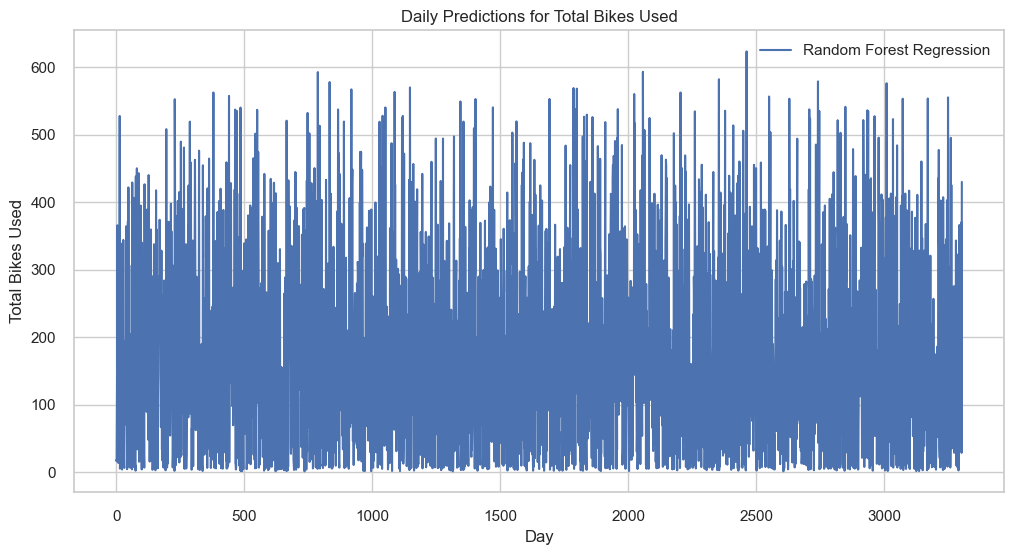

In [ ]:

# Define the features and target variables
features = ['season', 'workingday', 'temp', 'hour', 'humidity']
target = 'total'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Bike_Sharing_hour[features], Bike_Sharing_hour[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
  
]

# Function to evaluate the models and return the daily predictions
def predict_daily_bike_usage(models, X_train, X_test, y_train):
    daily_predictions = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make daily predictions on the testing data
        daily_pred = model.predict(X_test)
        
        # Add the daily predictions to the list
        daily_predictions.append(daily_pred)
        
    return daily_predictions

# Get the daily predictions for each model
daily_predictions = predict_daily_bike_usage(models, X_train, X_test, y_train)

# Plot the daily predictions for each model
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Add grid lines to the plot
for name, daily_pred in zip([model[0] for model in models], daily_predictions):
    plt.plot(daily_pred, label=name)
plt.xlabel('Day')
plt.ylabel('Total Bikes Used')
plt.title('Daily Predictions for Total Bikes Used')
plt.legend()
plt.show()


#x hours, 730 days,  24 months, 2011-2012

 #How was day calculated? can I get a regression line plot?

2 corresponds to the season (e.g., 2 represents spring).
1 indicates whether it's a working day (1 means it is a working day).
1 represents the weather condition (e.g., 1 represents clear weather).
25 is the temperature in Celsius.
8 denotes the hour of the day.
70 is the humidity level.

# Peak Hours Prediction all models

#Analyzed peak hours [8, 9, 17, 18]

In [ ]:
#Peak hours prediction
# Define the features and target variables
features = [ 'workingday', 'temp', 'hour', 'humidity']
target = 'total'

# Filter the data for peak hours 
peak_hours = [8, 9, 17, 18]
peak_data = Bike_Sharing_hour[Bike_Sharing_hour['hour'].isin(peak_hours)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(peak_data[features], peak_data[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]


def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Provide prediction for a specific scenario during peak hours
        scenario_data = [[2, 1, 1, 8, 70]]  # Example scenario data during peak hours (5 features)
        scenario_prediction = model.predict(scenario_data)
        print(f'Predicted number of bikes for the scenario during peak hours: {scenario_prediction[0]}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores for peak hours
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores for peak hours
for model, score in top_models[:10]:
    print(f"{model}: {score}")



NameError: name 'Bike_Sharing_hour' is not defined

Random Forest Regression:
R2 Score: 0.8137151233914623
MSE: 5898.787243570431
MAE: 49.5498959386573

Gradient Boosting Regression:
R2 Score: 0.7986962556447572
MSE: 6374.365868577693
MAE: 55.41904189036389

Support Vector Regression:
R2 Score: 0.3356997096150196
MSE: 21035.341945968055
MAE: 92.26265185683246

K-Nearest Neighbors Regression:
R2 Score: 0.7936175418000502
MSE: 6535.185431530495
MAE: 53.15212888377446



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names


Neural Network Regression:
R2 Score: 0.5454615883863015
MSE: 14393.14577196744
MAE: 79.51144718840546

Linear Regression:
R2 Score: 0.34264757456841555
MSE: 20815.33494430862
MAE: 106.91823761421813

Decision Tree Regression:
R2 Score: 0.7213901607674214
MSE: 8822.29516168368
MAE: 59.33724656145542

Bayesian Ridge Regression:
R2 Score: 0.34263633483556033
MSE: 20815.690855072793
MAE: 106.91673162793214

Model: Random Forest Regression


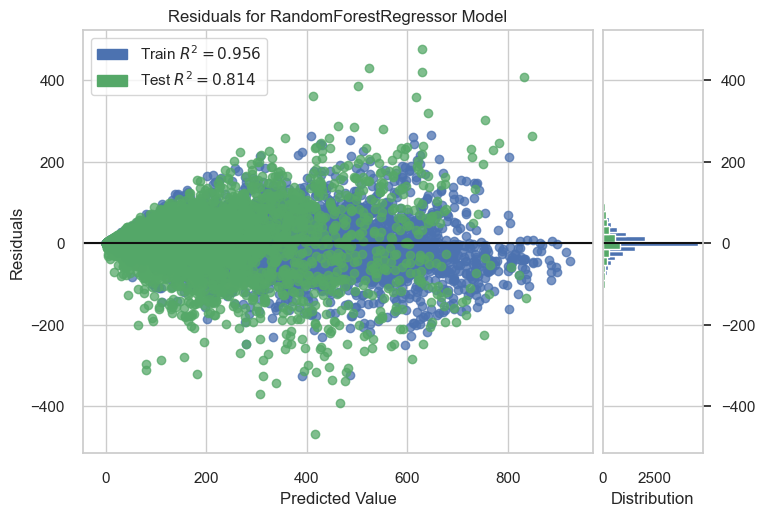

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names


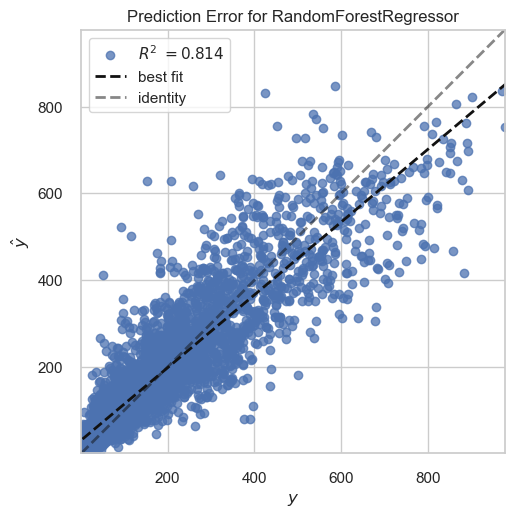

Model: Gradient Boosting Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names


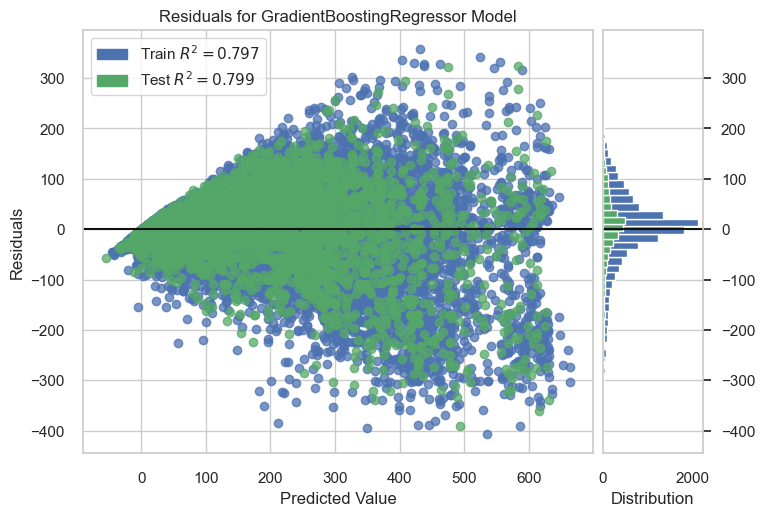

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names


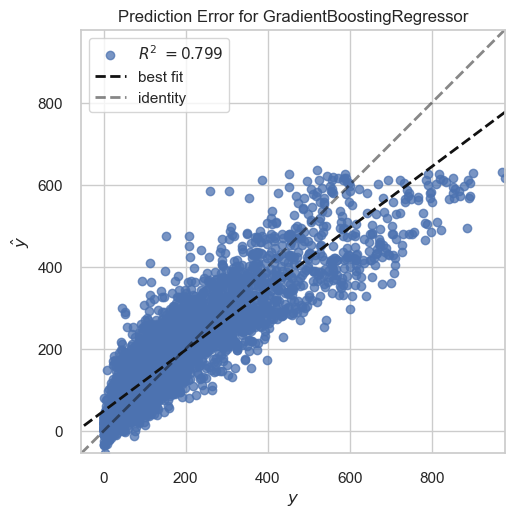

Model: K-Nearest Neighbors Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names


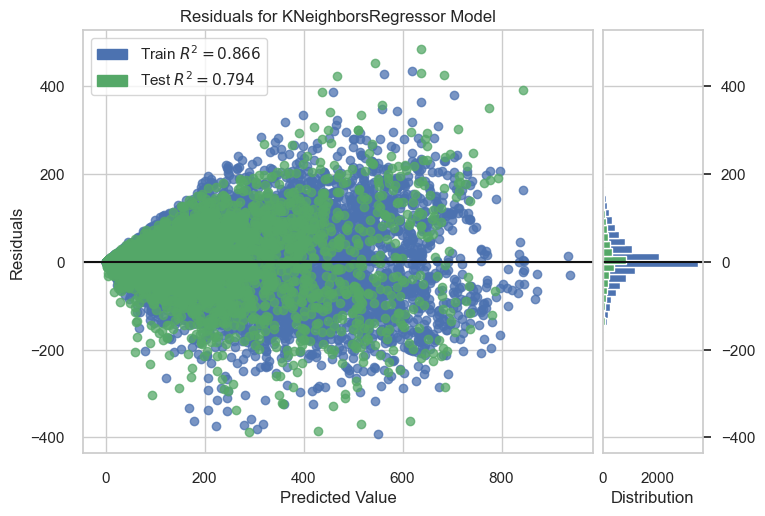

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names


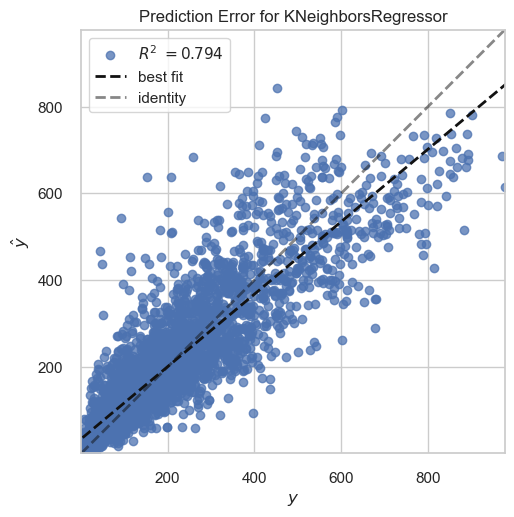

Model: Decision Tree Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


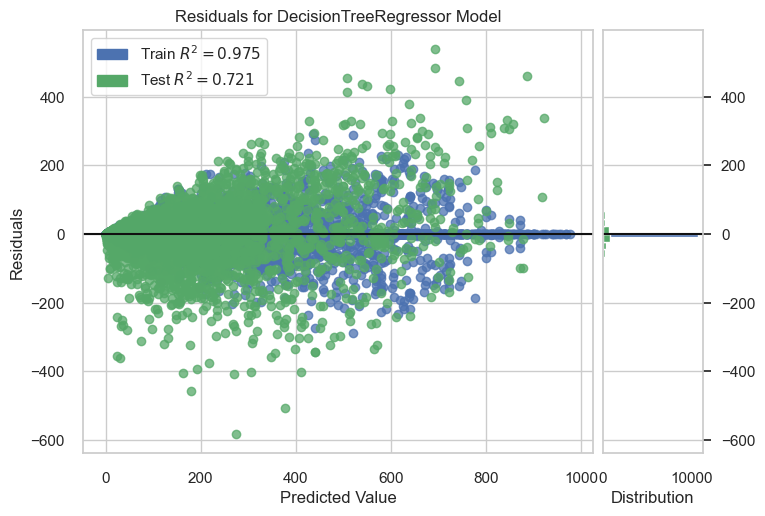

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


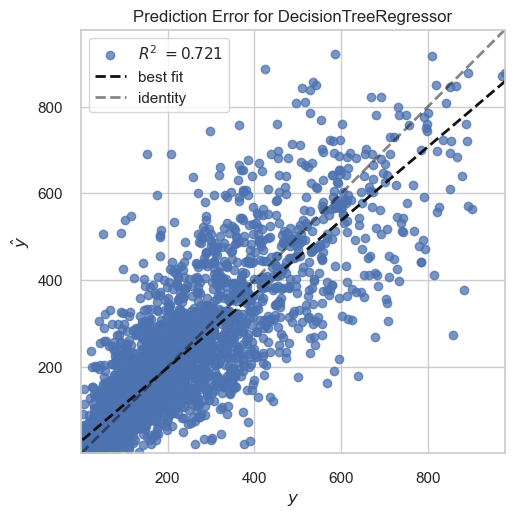

Model: Neural Network Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names


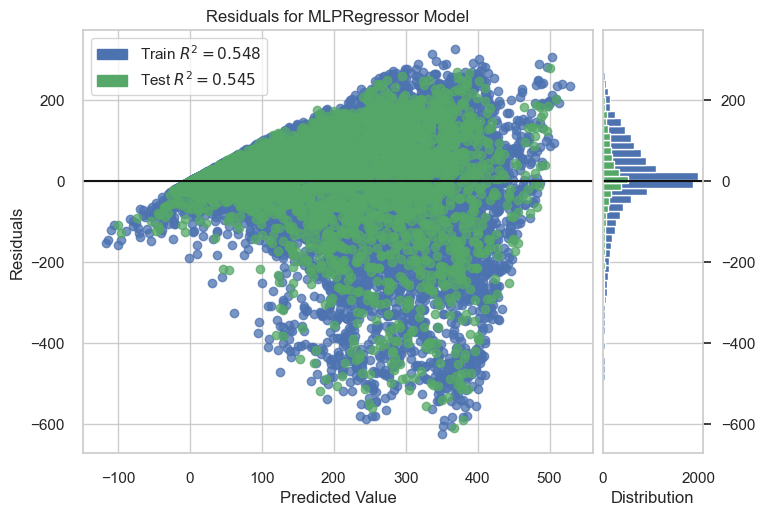

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names


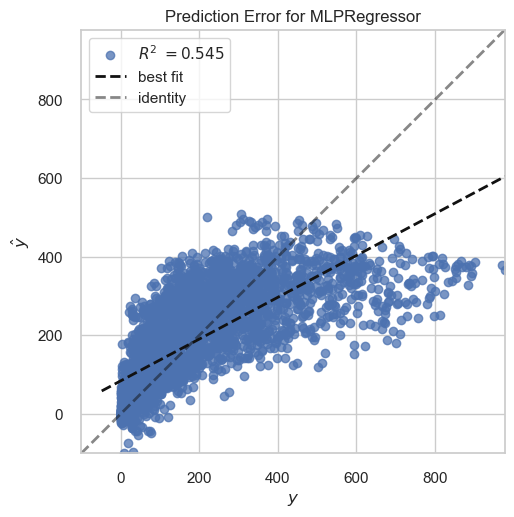

Model: Linear Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names


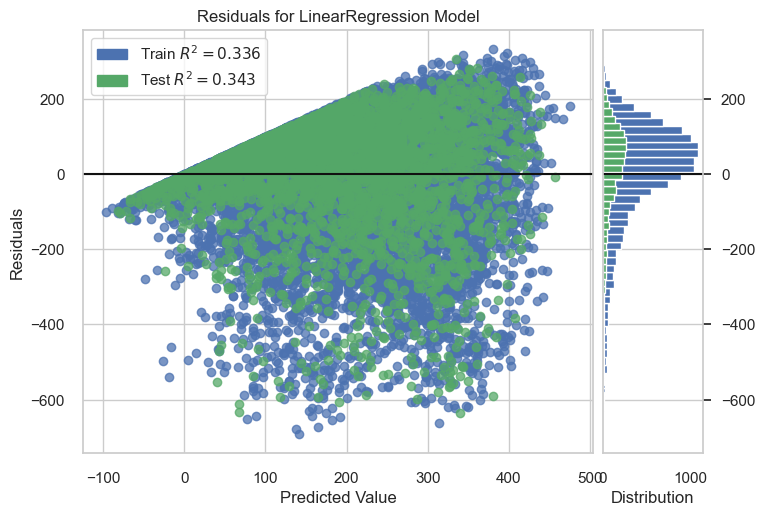

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names


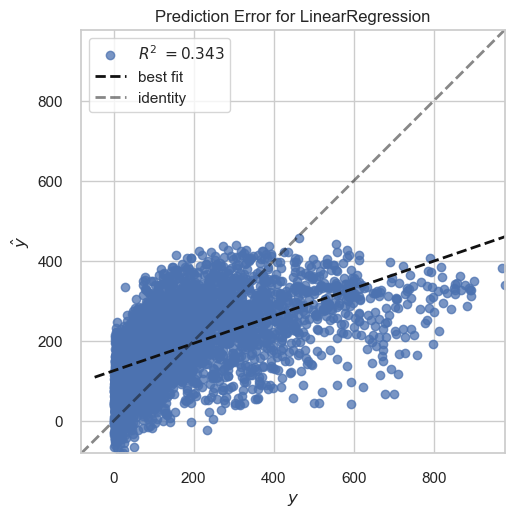

Model: Bayesian Ridge Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names


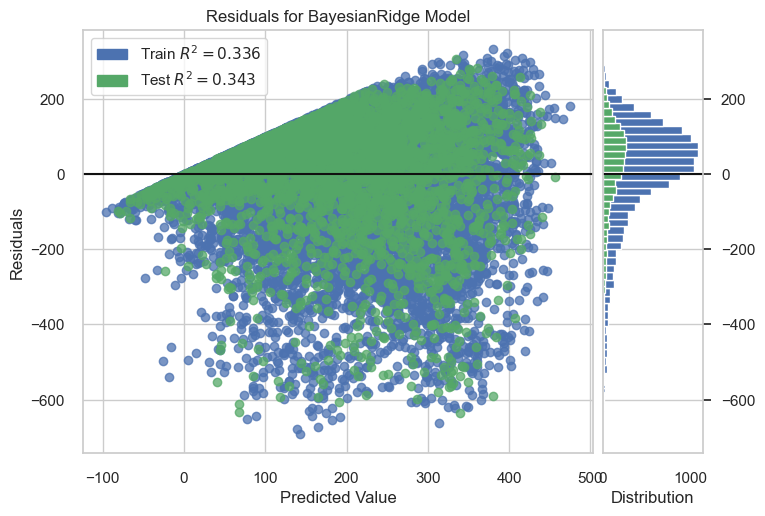

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names


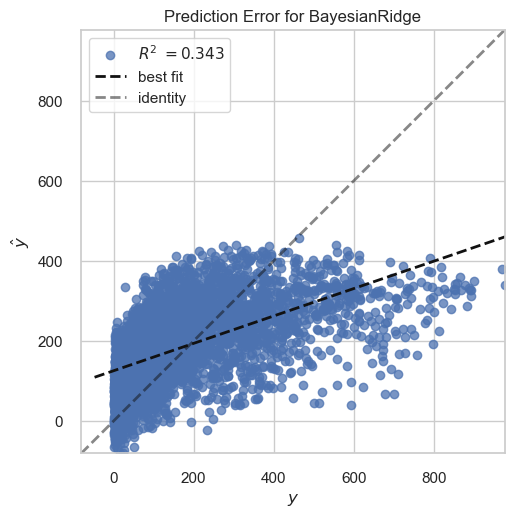

Model: Support Vector Regression


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names


KeyboardInterrupt: 

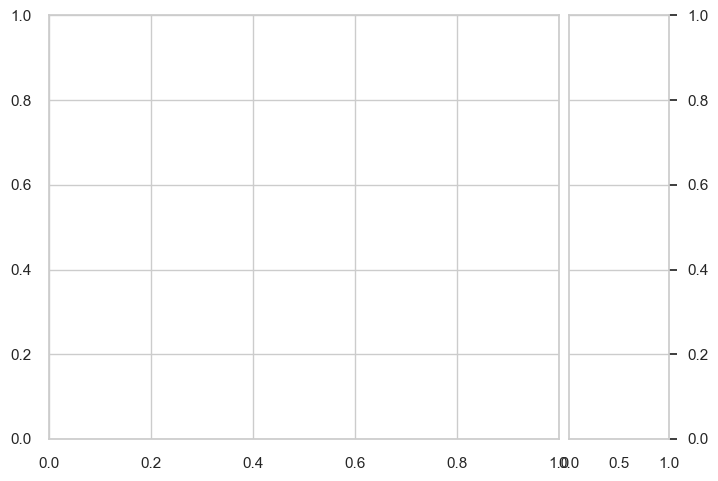

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from yellowbrick.regressor import ResidualsPlot, PredictionError

# Define the features and target variables
features = ['season', 'workingday', 'temp', 'hour', 'humidity']
target = 'total'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Bike_Sharing_hour[features], Bike_Sharing_hour[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

# Function to evaluate the models and return the top models
def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)

        # Make predictions on the testing data
        y_pred = model.predict(X_test)

        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)

        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)

        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)

        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')

        # Add the model and its score to the top models list
        top_models.append((name, r2))

    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)

    return top_models

# Get the top regression models
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Visualize the top models
for name, r2_score in top_models:
    print(f"Model: {name}")
    model = next(model for model in models if model[0] == name)[1]

    residuals_plot = ResidualsPlot(model)
    residuals_plot.fit(X_train, y_train)
    residuals_plot.score(X_test, y_test)
    residuals_plot.show()

    prediction_error = PredictionError(model)
    prediction_error.fit(X_train, y_train)
    prediction_error.score(X_test, y_test)
    prediction_error.show()



# Plot the accuracy results of the models using seaborn boxplots
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Add grid lines to the plot
sns.boxplot(x=[model[0] for model in top_models], y=[model[1] for model in top_models], palette="Blues")  # Use a different color palette

plt.title('Algorithm Comparison')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=90, fontsize=10)  # Rotate and adjust font size of x-axis tick labels

plt.tight_layout()  # Adjust the layout to prevent overlapping

plt.show()


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



# Define the features and target variables
features = ['season', 'workingday', 'temp', 'hour', 'humidity']
target = 'total'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Bike_Sharing_hour[features], Bike_Sharing_hour[target], test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Regression model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print(f'Random Forest Regression R2 Score: {r2}')

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Random Forest Regression MSE: {mse}')

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Random Forest Regression MAE: {mae}')

# Provide total predictions per day
total_predictions = model.predict(Bike_Sharing_hour[features])
print('Total predictions per day:')
print(total_predictions)

# Make predictions for the given scenario
scenario = [[2, 1, 30, 12, 60]]  # Summer, clear, not too humid
scenario_predictions = model.predict(scenario)
print('Predicted number of bikes for the scenario (average per day):')
print(scenario_predictions)


NameError: name 'train_test_split' is not defined

In [ ]:
#Peak hours
# Define the features and target variables
features = ['season', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'member'

# Filter the data for peak hours 
peak_hours = [ 8, 9, 17, 18]
peak_data = Bike_Sharing_hour[Bike_Sharing_hour['hour'].isin(peak_hours)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(peak_data[features], peak_data[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]


def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Provide prediction for a specific scenario during peak hours
        scenario_data = [[2, 1, 1, 25, 8, 70]]  # Example scenario data during peak hours
        scenario_prediction = model.predict(scenario_data)
        print(f'Predicted number of bikes for the scenario during peak hours: {scenario_prediction[0]}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores for peak hours
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores for peak hours
for model, score in top_models[:10]:
    print(f"{model}: {score}")


TypeError: 'numpy.float64' object is not callable

In [ ]:
#Peak hours
# Define the features and target variables
features = ['season', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'member'

# Filter the data for peak hours 
peak_hours = [ 8, 9, 17, 18]
peak_data = Bike_Sharing_hour[Bike_Sharing_hour['hour'].isin(peak_hours)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(peak_data[features], peak_data[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]


def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Provide prediction for a specific scenario during peak hours
        scenario_data = [[3, 1, 1, 25, 8, 70]]  # Example scenario data during peak hours
        scenario_prediction = model.predict(scenario_data)
        print(f'Predicted number of bikes for the scenario during peak hours: {scenario_prediction[0]}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores for peak hours
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores for peak hours
for model, score in top_models[:10]:
    print(f"{model}: {score}")



# Plot the accuracy results of the models using seaborn boxplots
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Add grid lines to the plot
sns.boxplot(x=[model[0] for model in top_models], y=[model[1] for model in top_models], palette="Blues")  # Use a different color palette

plt.title('Algorithm Comparison')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=90, fontsize=10)  # Rotate and adjust font size of x-axis tick labels

plt.tight_layout()  # Adjust the layout to prevent overlapping

plt.show()

TypeError: 'numpy.float64' object is not callable

In [ ]:
# Get the top regression models for peak hours
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Visualize the residuals for the top models during peak hours
for name, r_squared in top_models:
    print(f"Model: {name}")
    model = next(model for model in models if model[0] == name)[1]

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Calculate the residuals
    residuals = y_test - y_pred

    # Create the residuals plot
    sns.residplot(y_pred, residuals, lowess=True, color='b')
    plt.title(f"{name} - Residuals Plot")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.show()




TypeError: 'numpy.float64' object is not callable

In [ ]:
# Define the features and target variables
features = ['season', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'non_member'

# Filter the data for peak hours 
peak_hours = [ 8, 9, 17, 18]
peak_data = Bike_Sharing_hour[Bike_Sharing_hour['hour'].isin(peak_hours)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(peak_data[features], peak_data[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]


def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Provide prediction for a specific scenario during peak hours
        scenario_data = [[2, 1, 1, 25, 8, 70]]  # Example scenario data during peak hours
        scenario_prediction = model.predict(scenario_data)
        print(f'Predicted number of bikes for the scenario during peak hours: {scenario_prediction[0]}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores for peak hours
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores for peak hours
for model, score in top_models[:10]:
    print(f"{model}: {score}")


Random Forest Regression:
R2 Score: 0.6983815257005739
MSE: 670.1343304706231
MAE: 15.858628048433367

Predicted number of bikes for the scenario during peak hours: 22.948499999999996

Gradient Boosting Regression:
R2 Score: 0.749746157206119
MSE: 556.0126639387919
MAE: 15.252894517720872

Predicted number of bikes for the scenario during peak hours: -19.977055971972252



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Support Vector Regression:
R2 Score: 0.19213018626748746
MSE: 1794.9208780746565
MAE: 27.01658987397612

Predicted number of bikes for the scenario during peak hours: 29.63592165949396

K-Nearest Neighbors Regression:
R2 Score: 0.6491037567539903
MSE: 779.6194168096055
MAE: 17.180445969125216

Predicted number of bikes for the scenario during peak hours: 25.0



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Neural Network Regression:
R2 Score: 0.531602788503686
MSE: 1040.682446423297
MAE: 21.950454270699463

Predicted number of bikes for the scenario during peak hours: 432.81639730480595

Linear Regression:
R2 Score: 0.5183088541846563
MSE: 1070.2188393610832
MAE: 22.80919033709176

Predicted number of bikes for the scenario during peak hours: 865.8019478707615

Decision Tree Regression:
R2 Score: 0.47157853034733466
MSE: 1174.0440256336954
MAE: 19.987106918238993

Predicted number of bikes for the scenario during peak hours: 20.5

Bayesian Ridge Regression:
R2 Score: 0.5180801866501458
MSE: 1070.7268916794817
MAE: 22.805552381278368

Predicted number of bikes for the scenario during peak hours: 864.838615068956

Gradient Boosting Regression: 0.749746157206119
Random Forest Regression: 0.6983815257005739
K-Nearest Neighbors Regression: 0.6491037567539903
Neural Network Regression: 0.531602788503686
Linear Regression: 0.5183088541846563
Bayesian Ridge Regression: 0.5180801866501458
Decisio

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BayesianRidge was 

In [ ]:
# Define the features and target variables
features = ['season', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'non_member'

# Filter the data for peak hours 
peak_hours = [8, 17, 18]
peak_data = Bike_Sharing_hour[Bike_Sharing_hour['hour'].isin(peak_hours)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(peak_data[features], peak_data[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Provide prediction for a specific scenario during peak hours
        scenario_data = [[3, 1, 2, 25, 8, 70], [3, 1, 2, 25, 17, 70], [3, 1, 2, 25, 18, 70]]
        scenario_prediction = model.predict(scenario_data)
        for i in range(len(scenario_data)):
            print(f'Predicted number of bikes for the scenario during peak hours (Hour: {scenario_data[i][4]}): {scenario_prediction[i]}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores for peak hours
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores for peak hours
for model, score in top_models[:10]:
    print(f"{model}: {score}")


Random Forest Regression:
R2 Score: 0.7446876654888813
MSE: 650.6249909220447
MAE: 15.3328620464204

Predicted number of bikes for the scenario during peak hours (Hour: 8): 25.34357142857143

Predicted number of bikes for the scenario during peak hours (Hour: 17): 35.71

Predicted number of bikes for the scenario during peak hours (Hour: 18): 31.5

Gradient Boosting Regression:
R2 Score: 0.7679507149613507
MSE: 591.3426167240783
MAE: 15.079312912204188

Predicted number of bikes for the scenario during peak hours (Hour: 8): -23.105010508242753

Predicted number of bikes for the scenario during peak hours (Hour: 17): 3.275052207118833

Predicted number of bikes for the scenario during peak hours (Hour: 18): -24.583964145480902



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Support Vector Regression:
R2 Score: 0.1822476569242253
MSE: 2083.9185533630625
MAE: 29.604628487917218

Predicted number of bikes for the scenario during peak hours (Hour: 8): 31.85662680864338

Predicted number of bikes for the scenario during peak hours (Hour: 17): 31.856626808643817

Predicted number of bikes for the scenario during peak hours (Hour: 18): 31.85662680864384

K-Nearest Neighbors Regression:
R2 Score: 0.6837320487257661
MSE: 805.9611899313501
MAE: 16.606864988558353

Predicted number of bikes for the scenario during peak hours (Hour: 8): 13.4

Predicted number of bikes for the scenario during peak hours (Hour: 17): 9.6

Predicted number of bikes for the scenario during peak hours (Hour: 18): 10.4



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Neural Network Regression:
R2 Score: 0.4932682508082653
MSE: 1291.3294625936935
MAE: 24.546428669114533

Predicted number of bikes for the scenario during peak hours (Hour: 8): 0.5014129180011972

Predicted number of bikes for the scenario during peak hours (Hour: 17): 40.134689063381614

Predicted number of bikes for the scenario during peak hours (Hour: 18): 44.539929527438844

Linear Regression:
R2 Score: 0.5318246338611436
MSE: 1193.074333550277
MAE: 23.373014770689934

Predicted number of bikes for the scenario during peak hours (Hour: 8): 808.138614191558

Predicted number of bikes for the scenario during peak hours (Hour: 17): 832.5678625841795

Predicted number of bikes for the scenario during peak hours (Hour: 18): 835.282223516693

Decision Tree Regression:
R2 Score: 0.5883137409422228
MSE: 1049.1203610475466
MAE: 20.360030511060256

Predicted number of bikes for the scenario during peak hours (Hour: 8): 15.0

Predicted number of bikes for the scenario during peak hours (Hour

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BayesianRidge was 

In [ ]:
# Define the features and target variables
features = ['season', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'member'

# Filter the data for peak hours 
peak_hours = [8, 17, 18]
peak_data = Bike_Sharing_hour[Bike_Sharing_hour['hour'].isin(peak_hours)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(peak_data[features], peak_data[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Provide prediction for a specific scenario during peak hours
        scenario_data = [[3, 1, 2, 25, 8, 70], [3, 1, 2, 25, 17, 70], [3, 1, 2, 25, 18, 70]]
        scenario_prediction = model.predict(scenario_data)
        for i in range(len(scenario_data)):
            print(f'Predicted number of bikes for the scenario during peak hours (Hour: {scenario_data[i][4]}): {scenario_prediction[i]}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores for peak hours
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores for peak hours
for model, score in top_models[:10]:
    print(f"{model}: {score}")


TypeError: 'numpy.float64' object is not callable

In [ ]:
# Define the features and target variables
features = ['season', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'total'

# Filter the data for peak hours 
peak_hours = [8, 17, 18]
peak_data = Bike_Sharing_hour[Bike_Sharing_hour['hour'].isin(peak_hours)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(peak_data[features], peak_data[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Provide prediction for a specific scenario during peak hours
        scenario_data = [[3, 1, 2, 25, 8, 70], [3, 1, 2, 25, 17, 70], [3, 1, 2, 25, 18, 70]]
        scenario_prediction = model.predict(scenario_data)
        for i in range(len(scenario_data)):
            print(f'Predicted number of bikes for the scenario during peak hours (Hour: {scenario_data[i][4]}): {scenario_prediction[i]}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores for peak hours
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores for peak hours
for model, score in top_models[:10]:
    print(f"{model}: {score}")
    


Random Forest Regression:
R2 Score: 0.6445140192726018
MSE: 19188.566279650015
MAE: 106.123570802005

Predicted number of bikes for the scenario during peak hours (Hour: 8): 361.56733333333335

Predicted number of bikes for the scenario during peak hours (Hour: 17): 380.269

Predicted number of bikes for the scenario during peak hours (Hour: 18): 362.664

Gradient Boosting Regression:
R2 Score: 0.71705585641291
MSE: 15272.873606858488
MAE: 100.00935965830055

Predicted number of bikes for the scenario during peak hours (Hour: 8): 97.06017169753878

Predicted number of bikes for the scenario during peak hours (Hour: 17): 78.67162751933881

Predicted number of bikes for the scenario during peak hours (Hour: 18): 84.67963611544018



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Support Vector Regression:
R2 Score: 0.03115950112528676
MSE: 52296.464938016004
MAE: 196.63949092463628

Predicted number of bikes for the scenario during peak hours (Hour: 8): 409.74945681691145

Predicted number of bikes for the scenario during peak hours (Hour: 17): 409.74945681691185

Predicted number of bikes for the scenario during peak hours (Hour: 18): 409.7494568169119

K-Nearest Neighbors Regression:
R2 Score: 0.6345976282040757
MSE: 19723.837254004575
MAE: 112.41281464530891

Predicted number of bikes for the scenario during peak hours (Hour: 8): 275.0

Predicted number of bikes for the scenario during peak hours (Hour: 17): 163.4

Predicted number of bikes for the scenario during peak hours (Hour: 18): 171.8



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Neural Network Regression:
R2 Score: 0.32168815660453287
MSE: 36614.191475659325
MAE: 159.5573975958512

Predicted number of bikes for the scenario during peak hours (Hour: 8): 2458.5507238631853

Predicted number of bikes for the scenario during peak hours (Hour: 17): 2557.0157930529385

Predicted number of bikes for the scenario during peak hours (Hour: 18): 2567.956356296244

Linear Regression:
R2 Score: 0.5981900217853885
MSE: 21689.061782462457
MAE: 120.35354682559374

Predicted number of bikes for the scenario during peak hours (Hour: 8): 1911.3814875239418

Predicted number of bikes for the scenario during peak hours (Hour: 17): 1922.8163528715863

Predicted number of bikes for the scenario during peak hours (Hour: 18): 1924.0868934657697

Decision Tree Regression:
R2 Score: 0.4223300194178208
MSE: 31181.70423340961
MAE: 128.38558352402745

Predicted number of bikes for the scenario during peak hours (Hour: 8): 355.0

Predicted number of bikes for the scenario during peak hours 

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BayesianRidge was 

In [ ]:
#K-fold validation:

from sklearn.model_selection import cross_val_score

# Define the features and target variables
features = ['season', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'non_member'

# Prepare the data
X = Bike_Sharing_hour[features]
y = Bike_Sharing_hour[target]

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

# Perform k-fold cross-validation for each regression model
for name, model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f'{name}:')
    print(f'R2 Scores: {scores}')
    print(f'Mean R2 Score: {scores.mean()}\n')


Random Forest Regression:
R2 Scores: [0.49695957 0.60683799 0.46655178 0.67869773 0.74852964]
Mean R2 Score: 0.5995153421269572

Gradient Boosting Regression:
R2 Scores: [0.66854393 0.65089312 0.511247   0.67487127 0.74072467]
Mean R2 Score: 0.6492559946908615

Support Vector Regression:
R2 Scores: [0.32167059 0.37385862 0.10207849 0.03320163 0.32179533]
Mean R2 Score: 0.23052093286275738

K-Nearest Neighbors Regression:
R2 Scores: [0.30302075 0.58491713 0.39259026 0.64880103 0.72351437]
Mean R2 Score: 0.5305687077282858



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Regression:
R2 Scores: [0.58927745 0.58537404 0.2327855  0.56256735 0.65692047]
Mean R2 Score: 0.525384964517168

Linear Regression:
R2 Scores: [ 0.25143788  0.2924537  -0.05494906  0.33441353  0.39800774]
Mean R2 Score: 0.24427275686456743

Decision Tree Regression:
R2 Scores: [0.18850786 0.41221889 0.15145067 0.57850752 0.65554795]
Mean R2 Score: 0.397246579339363

Bayesian Ridge Regression:
R2 Scores: [ 0.25172416  0.29288514 -0.05476661  0.33425334  0.39796791]
Mean R2 Score: 0.2444127892597745



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#combined features to your dataset, you provide the model with additional information that can potentially improve its performance in predicting the number of bikes per day. However, keep in mind that the effectiveness of these combinations may vary depending on the specific dataset and problem you are working with. It's important to experiment and evaluate the impact of these combined features on your model's performance.

In [ ]:
from sklearn.ensemble import VotingRegressor


# Define the features and target variables
features = ['season', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'non_member'

# Prepare the data
X = Bike_Sharing_hour[features]
y = Bike_Sharing_hour[target]

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

# Initialize an empty list to store the individual regression models
individual_models = []

# Train and store the individual regression models
for name, model in models:
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Append the trained model to the list
    individual_models.append((name, model))

# Create the ensemble model using model averaging
ensemble_model = VotingRegressor(estimators=individual_models)

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions using the ensemble model
y_pred = ensemble_model.predict(X_test)

# Calculate the performance metrics for the ensemble model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the scores for the ensemble model
print('Ensemble Model (Model Averaging):')
print(f'R2 Score: {r2}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Ensemble Model (Model Averaging):
R2 Score: 0.6428946020112691
MSE: 19275.979840629
MAE: 116.47525469775624


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In the above code, we initialize an empty list individual_models to store the individual regression models. Then, we train each model separately using the training data and store them in the list. Finally, we create the ensemble model using VotingRegressor from scikit-learn, passing the list of individual models as the estimators parameter. The ensemble model is then trained on the training data and used to make predictions on the test data. The performance metrics for the ensemble model are calculated and printed.

In [ ]:



# Define the features and target variables
features = ['season', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'total'

# Prepare the data
X = Bike_Sharing_hour[features]
y = Bike_Sharing_hour[target]

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

# Initialize an empty list to store the individual regression models
individual_models = []

# Train and store the individual regression models
for name, model in models:
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Append the trained model to the list
    individual_models.append((name, model))

# Create the ensemble model using model averaging
ensemble_model = VotingRegressor(estimators=individual_models)

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions using the ensemble model
y_pred = ensemble_model.predict(X_test)

# Calculate the performance metrics for the ensemble model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the scores for the ensemble model
print('Ensemble Model (Model Averaging):')
print(f'R2 Score: {r2}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Ensemble Model (Model Averaging):
R2 Score: 0.6500210364703076
MSE: 18891.306274388688
MAE: 115.09029108380213


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Define the features and target variables
features = ['season', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'total'  # Assuming 'total' represents the number of bikes rented per day

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Bike_Sharing_hour[features], Bike_Sharing_hour[target], test_size=0.2, random_state=42)

# Create a list to store the predictions from each model
all_predictions = []

# Fit and predict using each model
for name, model in models:
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Add the predictions to the list
    all_predictions.append(y_pred)

# Take the average of all predictions
ensemble_predictions = np.mean(all_predictions, axis=0)

# Calculate the evaluation metrics for the ensemble predictions
r2 = r2_score(y_test, ensemble_predictions)
mse = mean_squared_error(y_test, ensemble_predictions)
mae = mean_absolute_error(y_test, ensemble_predictions)

# Print the evaluation metrics
print("Ensemble Model (Model Averaging):")
print(f"R2 Score: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")

# Provide bike predictions for a specific scenario
scenario_data = [[2, 1, 1, 25, 8, 70]]  # Example scenario data
scenario_prediction = np.mean([model.predict(scenario_data) for model in models])
print(f"Predicted number of bikes for the scenario: {scenario_prediction}")


Ensemble Model (Model Averaging):
R2 Score: 0.7358629224802824
MSE: 8364.009208871414
MAE: 62.07260693552958


/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


AttributeError: 'tuple' object has no attribute 'predict'

#Hyperparameter tuning 

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the features and target variables
features = ['season', 'workingday', 'weather', 'temp', 'hour', 'humidity']
target = 'total'  # Assuming 'total' represents the number of bikes rented per day


# Define the hyperparameters for each model
model_hyperparameters = {
    'Random Forest Regression': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting Regression': {
        'learning_rate': [0.1, 0.05, 0.01],
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 10]
    },
    'Support Vector Regression': {
        'kernel': ['linear', 'rbf'],
        'C': [1, 10, 100]
    },
    # Add hyperparameters for other models
}

# Perform hyperparameter tuning for each model
for name, model in models:
    if name in model_hyperparameters:
        # Define the parameter grid for the model
        param_grid = model_hyperparameters[name]

        # Create GridSearchCV object
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)

        # Fit the GridSearchCV object on the training data
        grid_search.fit(X_train, y_train)

        # Print the best hyperparameters and score
        print(f"Best hyperparameters for {name}:")
        print(grid_search.best_params_)
        print(f"Best score: {grid_search.best_score_}\n")

        # Update the model with the best hyperparameters
        best_model = grid_search.best_estimator_
        models.append((name + ' (Tuned)', best_model))


Best hyperparameters for Random Forest Regression:
{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}
Best score: 0.8370287305917434

Best hyperparameters for Gradient Boosting Regression:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best score: 0.8459255171344584

Best hyperparameters for Support Vector Regression:
{'C': 100, 'kernel': 'rbf'}
Best score: 0.47819439472558384



#Now let's try to predict rides per variable.

In [ ]:
# Define the features and target variables
features = ['weather', 'temp', 'hour', 'humidity']
target = 'total'

# Filter the data for peak hours 
peak_hours = [8, 17, 18]
peak_data = Bike_Sharing_hour[Bike_Sharing_hour['hour'].isin(peak_hours)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(peak_data[features], peak_data[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')
        print(f'R2 Score: {r2}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Provide prediction for a specific scenario during peak hours
        scenario_data = [[2, 25, 8, 70], [2, 25, 17, 70], [2, 25, 18, 70]]
        scenario_prediction = model.predict(scenario_data)
        for i in range(len(scenario_data)):
            print(f'Predicted number of bikes for the scenario during peak hours (Hour: {scenario_data[i][2]}): {scenario_prediction[i]}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores for peak hours
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores for peak hours
for model, score in top_models[:10]:
    print(f"{model}: {score}")


TypeError: 'numpy.float64' object is not callable

In [ ]:
# Define the features and target variables
features = ['weather', 'temp', 'hour', 'humidity']
target = 'total'

# Filter the data for peak hours 
peak_hours = [8, 17, 18]
peak_data = Bike_Sharing_hour[Bike_Sharing_hour['hour'].isin(peak_hours)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(peak_data[features], peak_data[target], test_size=0.2, random_state=42)

# Define the regression models
models = [
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor()),
    ('Neural Network Regression', MLPRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Bayesian Ridge Regression', BayesianRidge()),
]

def top_regression_models(models, X_train, X_test, y_train, y_test):
    top_models = []
    for name, model in models:
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        
      
        
        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        
        # Calculate the mean absolute error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Print the scores
        print(f'{name}:')

        print(f'MSE: {mse}')
        print(f'MAE: {mae}\n')
        
        # Provide prediction for a specific scenario during peak hours
        scenario_data = [[2, 25, 8, 70], [2, 25, 17, 70], [2, 25, 18, 70]]
        scenario_prediction = model.predict(scenario_data)
        for i in range(len(scenario_data)):
            print(f'Predicted number of bikes for the scenario during peak hours (Hour: {scenario_data[i][2]}): {scenario_prediction[i]}\n')
        
        # Add the model and its score to the top models list
        top_models.append((name, r2))
    
    # Sort the top models based on the R2 score
    top_models = sorted(top_models, key=lambda x: x[1], reverse=True)
    
    return top_models

# Get the top regression models and their scores for peak hours
top_models = top_regression_models(models, X_train, X_test, y_train, y_test)

# Print the top 10 models and their scores for peak hours
for model, score in top_models[:10]:
    print(f"{model}: {score}")

Random Forest Regression:
MSE: 25711.530287647205
MAE: 126.33771058984244

Predicted number of bikes for the scenario during peak hours (Hour: 8): 273.8788333333334

Predicted number of bikes for the scenario during peak hours (Hour: 17): 300.83714285714285

Predicted number of bikes for the scenario during peak hours (Hour: 18): 281.2004761904762

Gradient Boosting Regression:
MSE: 20812.576758199117
MAE: 119.5468498858633

Predicted number of bikes for the scenario during peak hours (Hour: 8): 78.42706685897882

Predicted number of bikes for the scenario during peak hours (Hour: 17): 81.95530114271048

Predicted number of bikes for the scenario during peak hours (Hour: 18): 23.806349298281905

Support Vector Regression:
MSE: 31618.621063047114
MAE: 159.34585262169819

Predicted number of bikes for the scenario during peak hours (Hour: 8): 319.1632426828146

Predicted number of bikes for the scenario during peak hours (Hour: 17): 319.1632426828146

Predicted number of bikes for the sc

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names


K-Nearest Neighbors Regression:
MSE: 23912.431354466862
MAE: 124.91412103746397

Predicted number of bikes for the scenario during peak hours (Hour: 8): 340.2

Predicted number of bikes for the scenario during peak hours (Hour: 17): 169.6

Predicted number of bikes for the scenario during peak hours (Hour: 18): 169.0



/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names


Neural Network Regression:
MSE: 32392.54467627069
MAE: 155.36167091162173

Predicted number of bikes for the scenario during peak hours (Hour: 8): 2579.2979940729197

Predicted number of bikes for the scenario during peak hours (Hour: 17): 2736.1963632416714

Predicted number of bikes for the scenario during peak hours (Hour: 18): 2753.629515371533

Linear Regression:
MSE: 24274.339152866174
MAE: 131.17306366688794

Predicted number of bikes for the scenario during peak hours (Hour: 8): 2589.976815261381

Predicted number of bikes for the scenario during peak hours (Hour: 17): 2614.9576379701643

Predicted number of bikes for the scenario during peak hours (Hour: 18): 2617.7332849378067

Decision Tree Regression:
MSE: 35014.686779538904
MAE: 146.64097022094143

Predicted number of bikes for the scenario during peak hours (Hour: 8): 312.0

Predicted number of bikes for the scenario during peak hours (Hour: 17): 312.0

Predicted number of bikes for the scenario during peak hours (Hour: 1

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names


Scenario 1:

Weather: 2
Temperature: 25
Hour: 8
Humidity: 70
Scenario 2:

Weather: 2
Temperature: 25
Hour: 17
Humidity: 70
Scenario 3:

Weather: 2
Temperature: 25
Hour: 18
Humidity: 70


#Create a model for peak hours in summer and spring when the weather is clear and humidity is low

In [ ]:
#Can I predict an average number per day w/o scenerio?
##Don't forget standarization 